In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_enhancedImage(input_image, image):
    # New dummy image that will contain the adjustments
    adjusted_image = np.zeros(input_image.shape, input_image.dtype)
    
    # Defining alpha and beta:
    alpha = 1.5   # Contrast Control [1.0-3.0]
    beta = 40    # Brightness Control [0-100]
    
    # Scaling and converting the image contrast and brightness
    adjusted_image = cv2.convertScaleAbs(input_image, alpha=alpha, beta=beta)
    
    # Histogram eq
    channels = cv2.split(adjusted_image)
    eq_channels = []
    for ch, color in zip(channels, ['B', 'G', 'R']):
        #applying histogram equalization on each channel of image one by one & appending result to eq_channels
        eq_channels.append(cv2.equalizeHist(ch)) #ch is one ele in channels which itself is numpy array
                                                 # contains the pixel values of image by color channel(R,G,B)
   
    # Merging all three channels into one final image
    eq_image = cv2.merge(eq_channels)

    # Already written to disk
#     cv2.imwrite(str(image[0:-4])+'_op.jpg', eq_image)
    
    # Plot histogram for equalized image
    channels = ('b', 'g', 'r')
    # we now separate the colors and plot each in the Histogram
    for i, color in enumerate(channels): #calcHist(images, channels, mask, bins, ranges)
        histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
        plt.xlim([0, 256]) # set the x-limits of the current axes.
    
    # show Histogram
    plt.show()
    
    
    

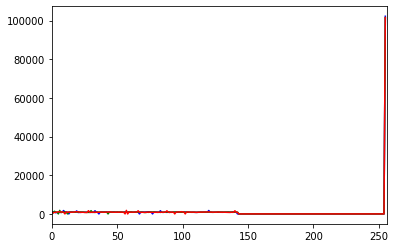

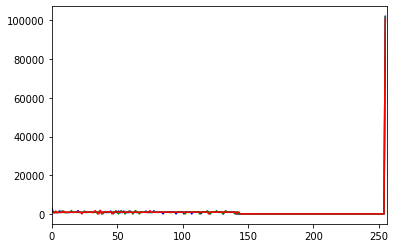

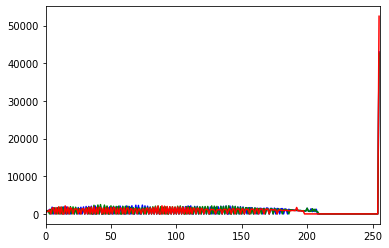

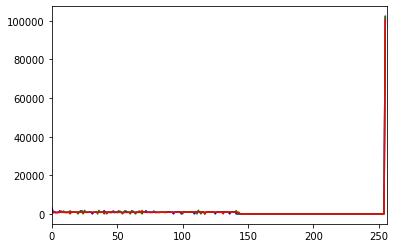

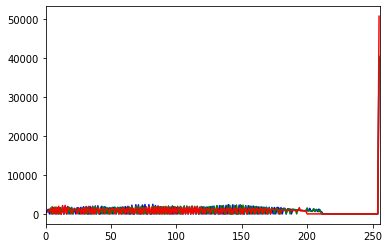

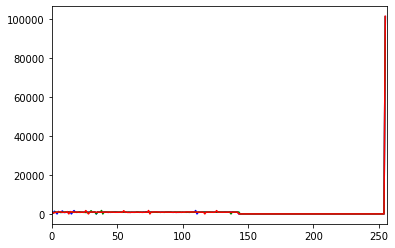

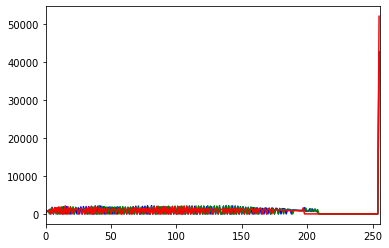

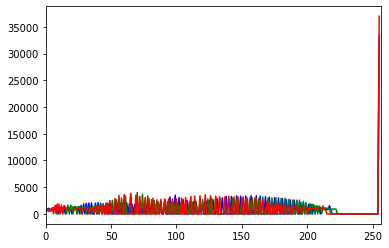

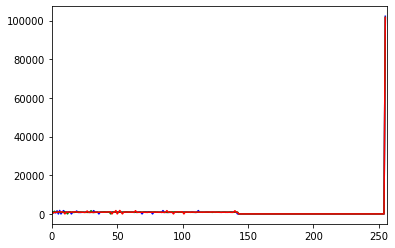

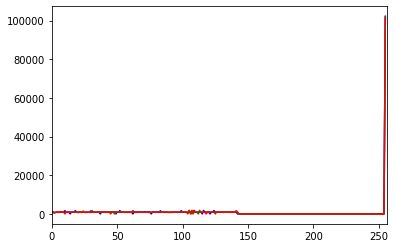

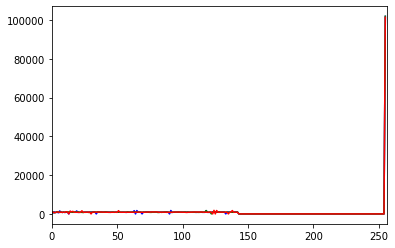

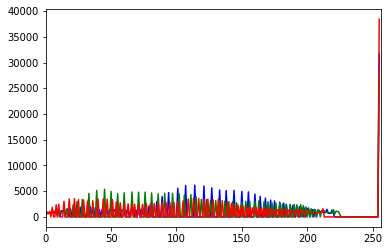

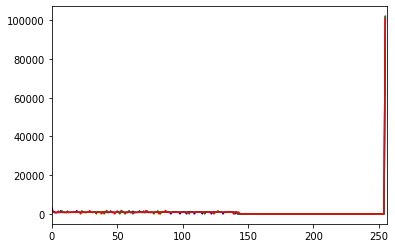

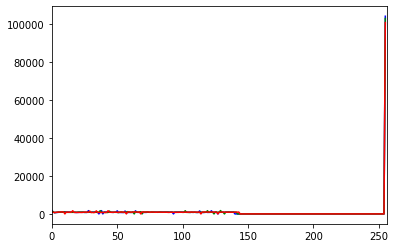

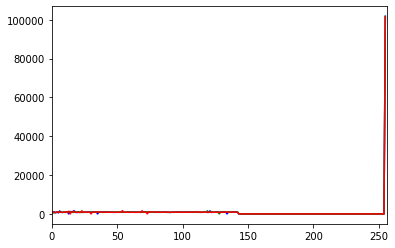

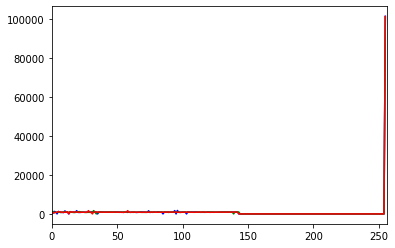

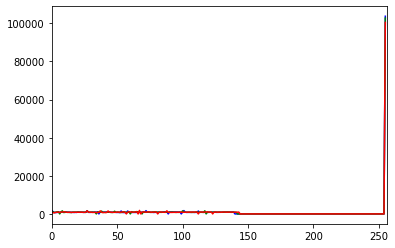

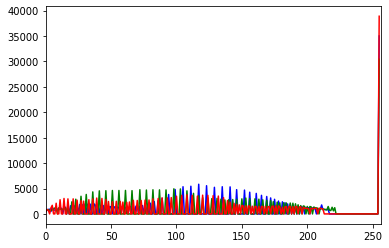

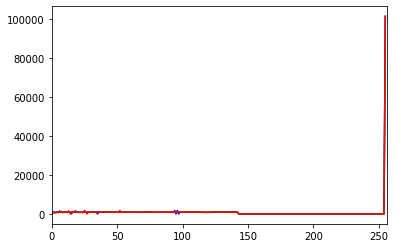

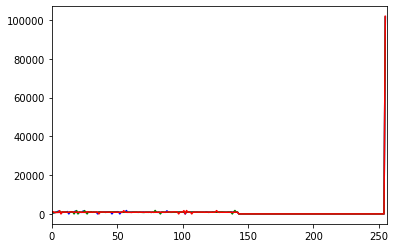

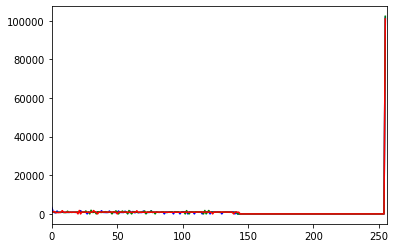

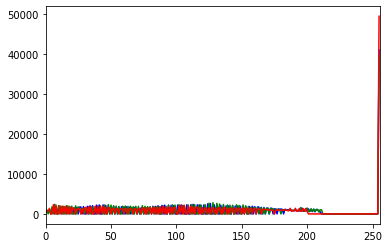

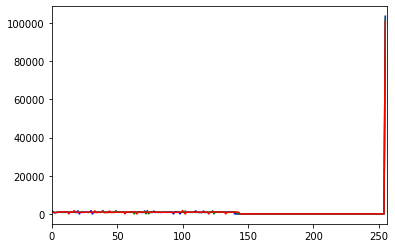

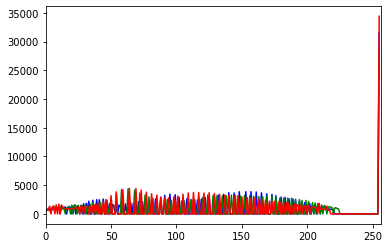

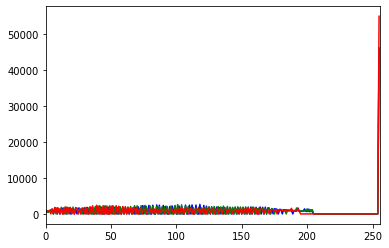

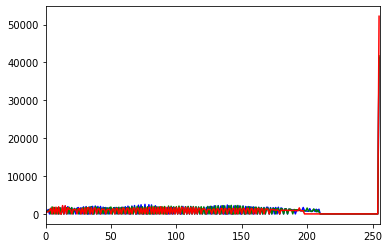

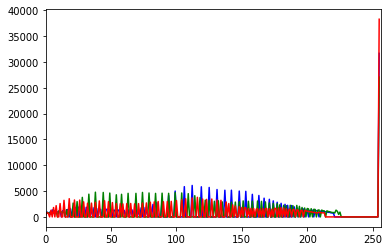

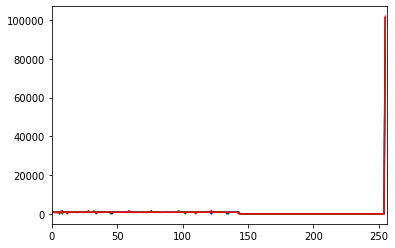

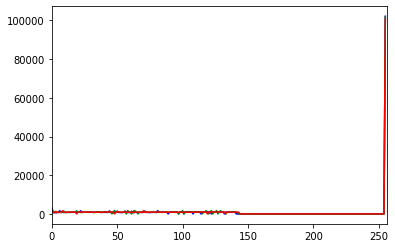

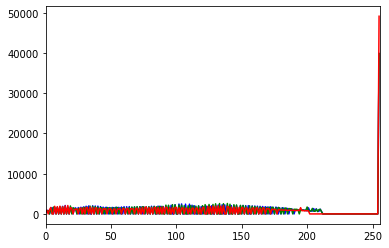

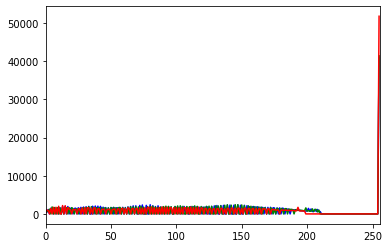

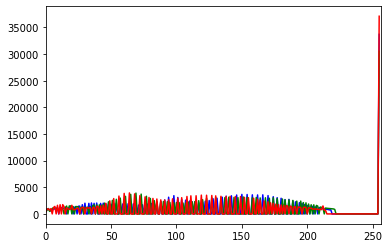

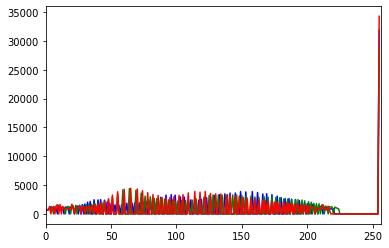

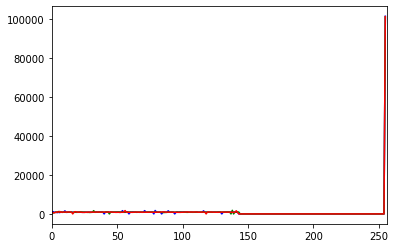

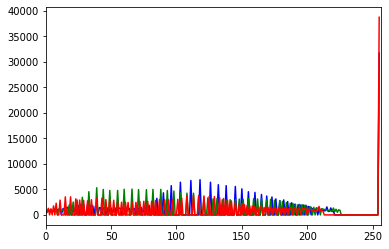

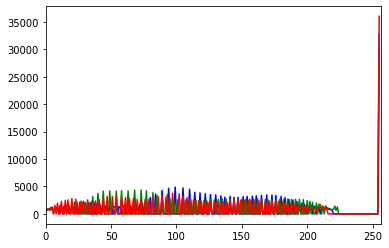

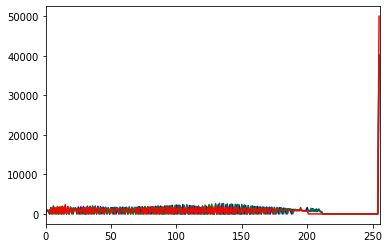

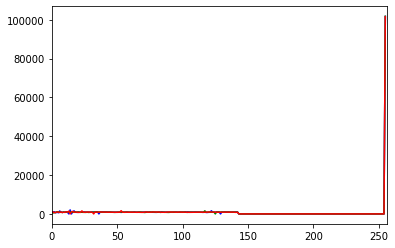

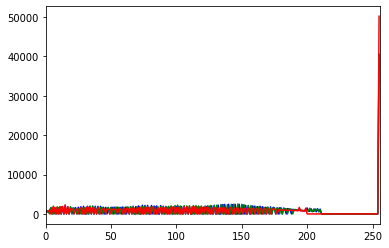

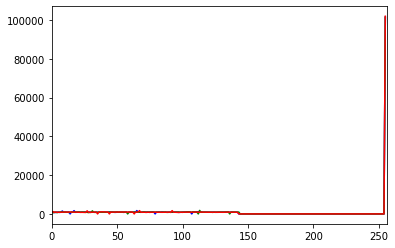

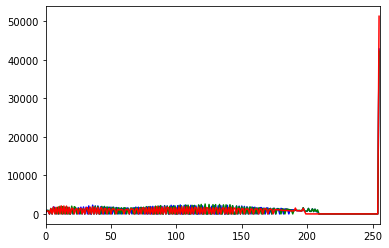

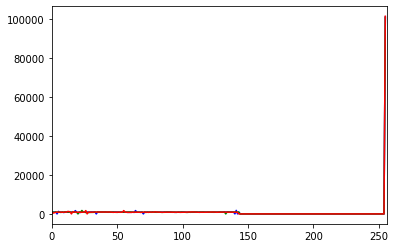

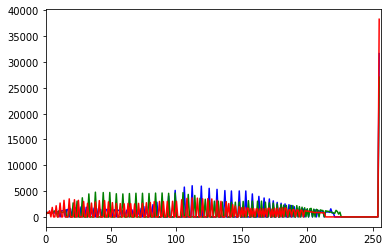

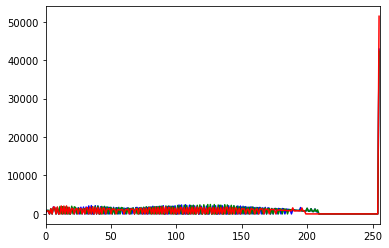

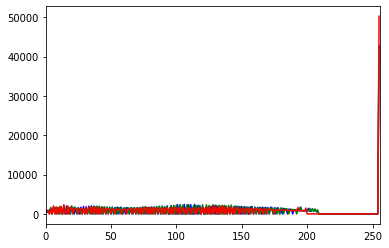

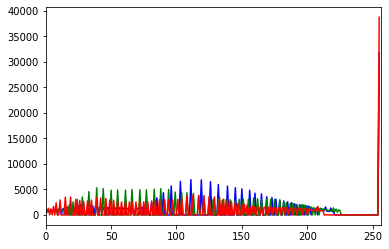

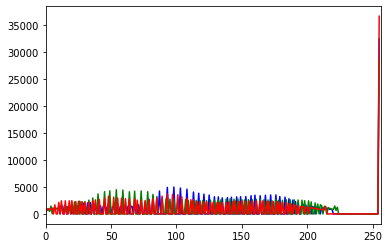

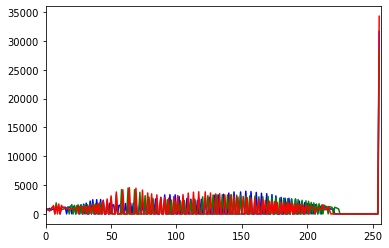

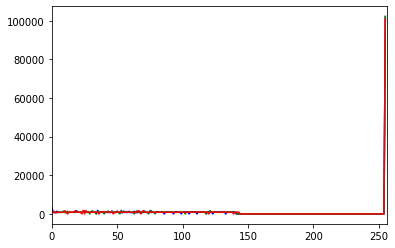

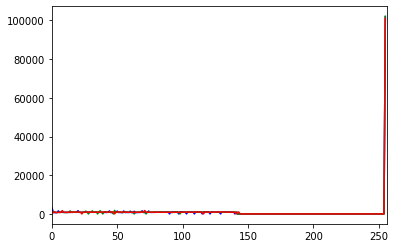

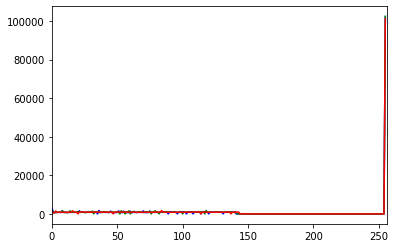

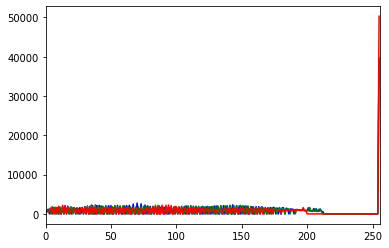

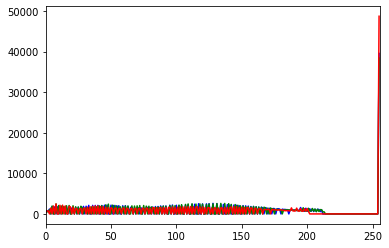

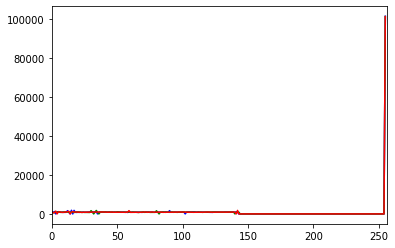

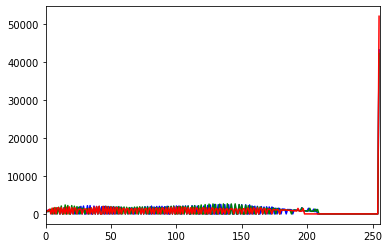

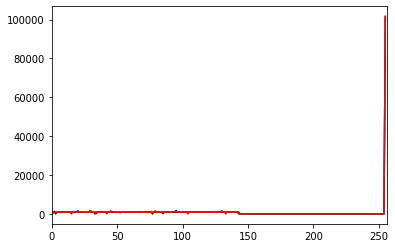

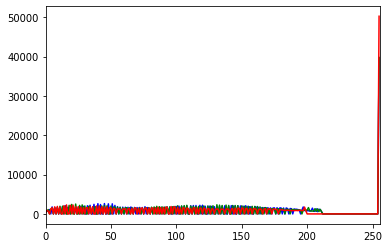

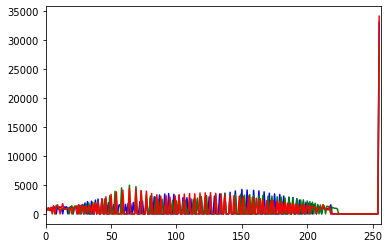

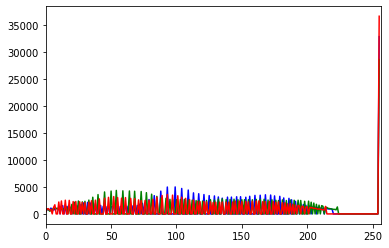

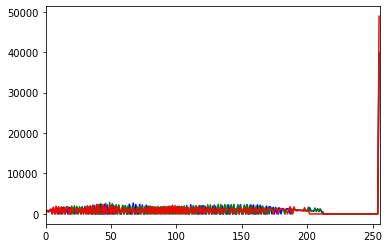

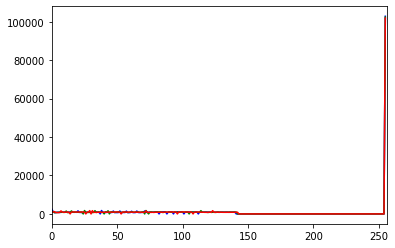

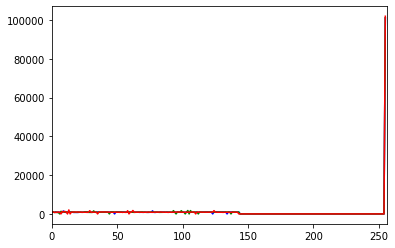

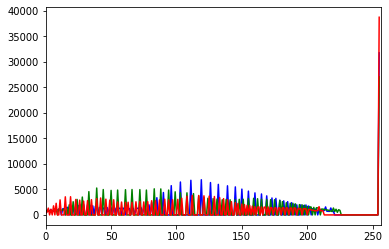

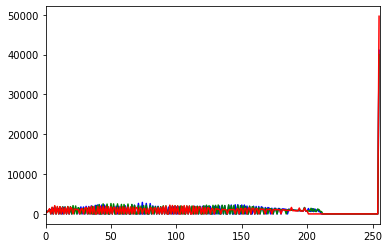

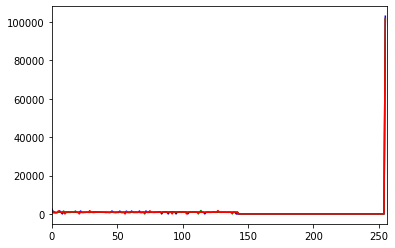

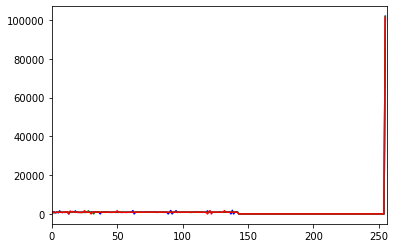

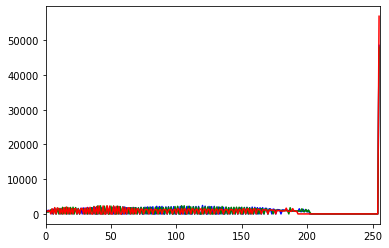

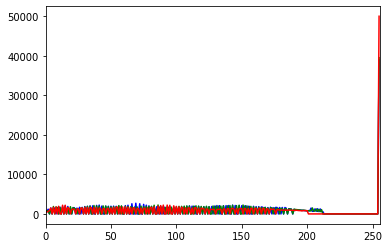

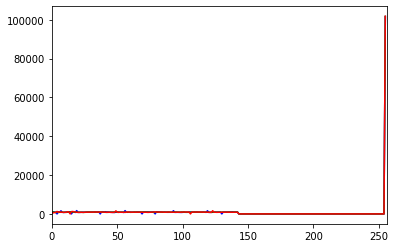

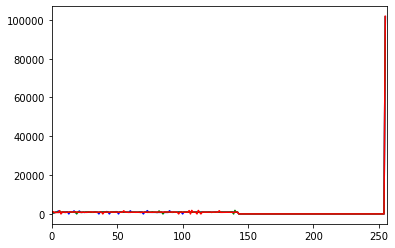

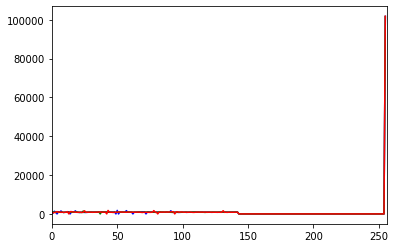

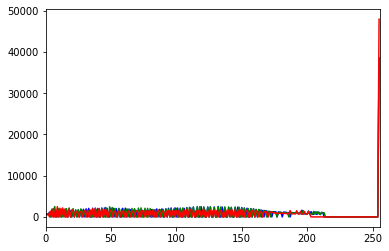

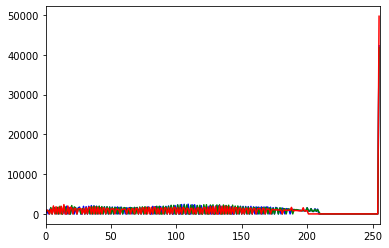

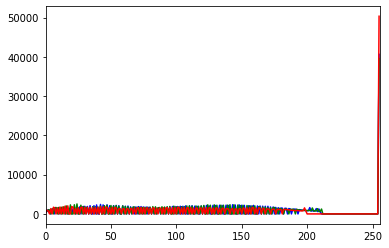

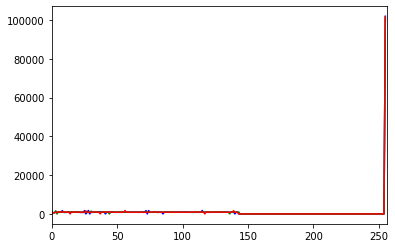

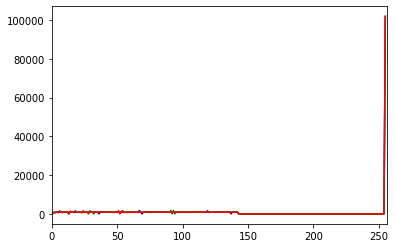

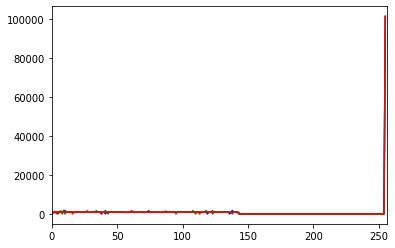

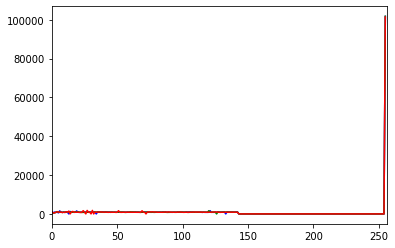

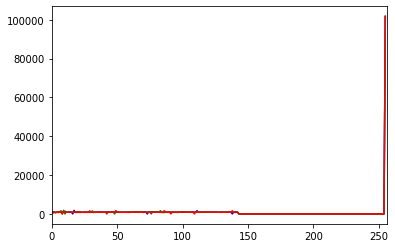

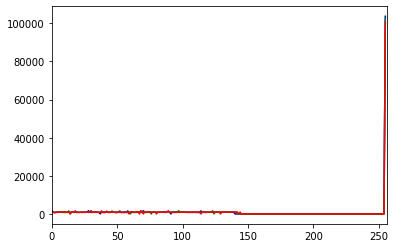

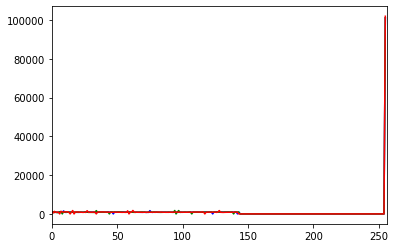

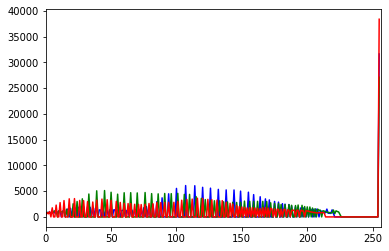

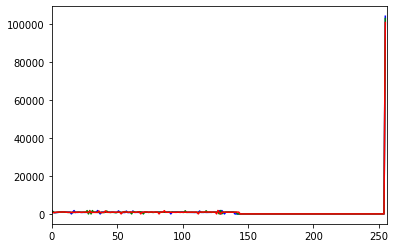

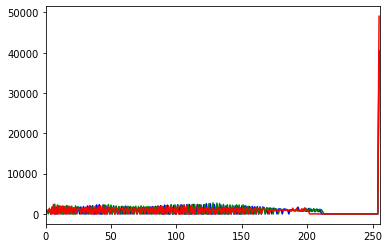

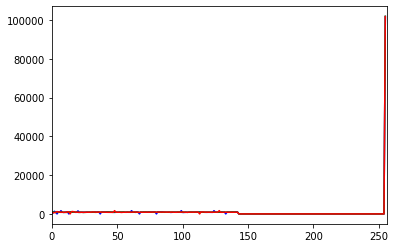

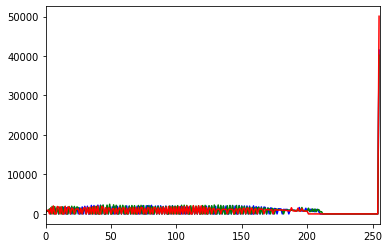

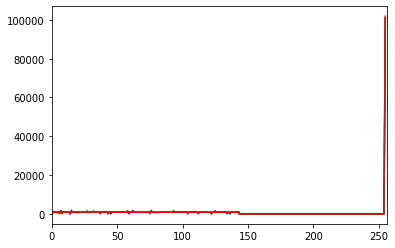

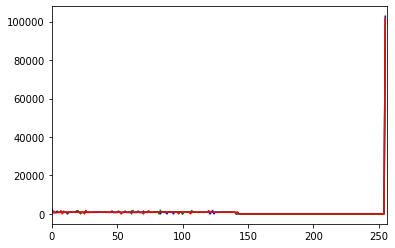

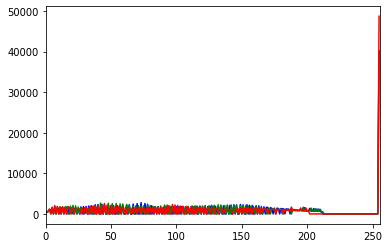

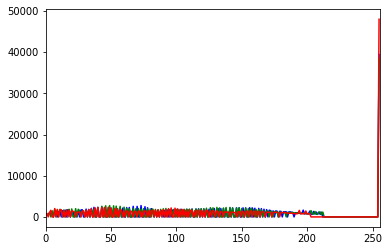

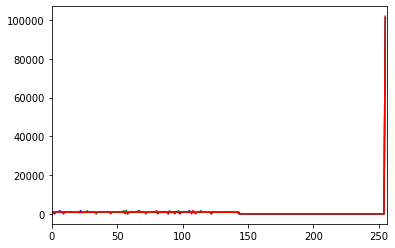

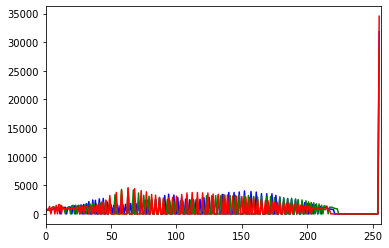

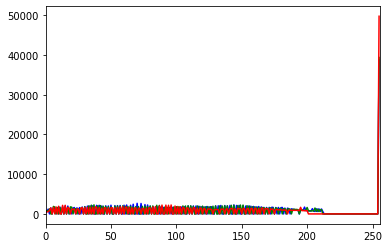

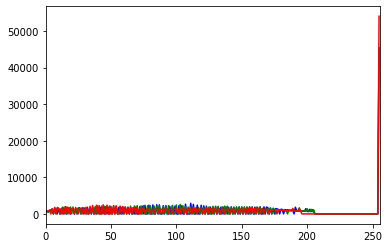

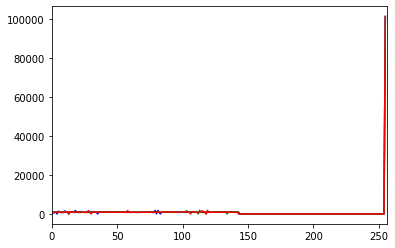

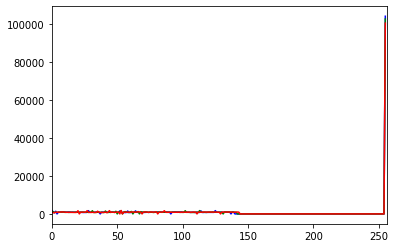

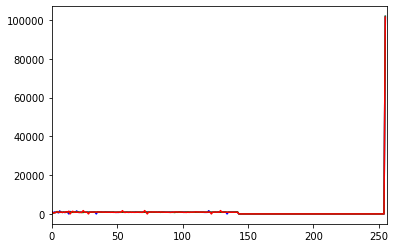

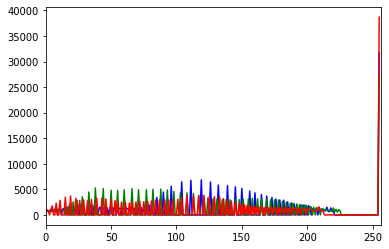

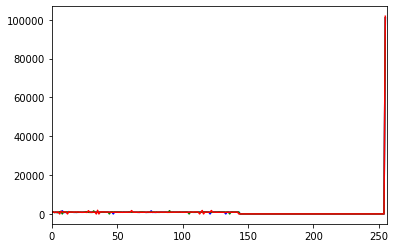

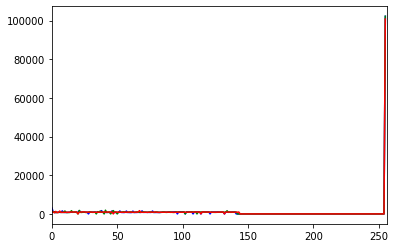

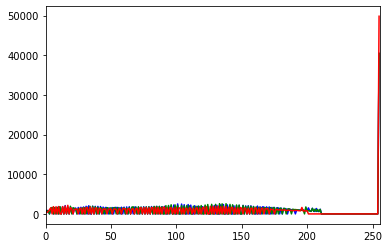

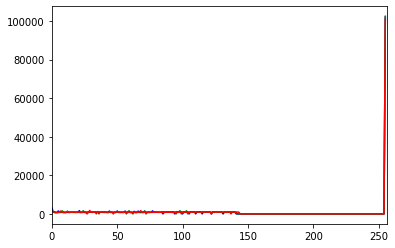

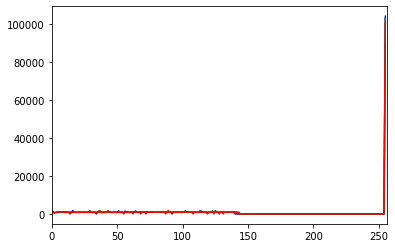

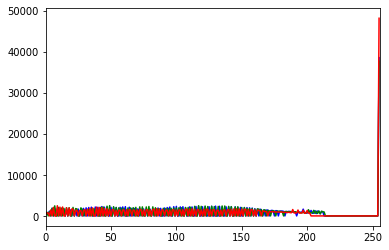

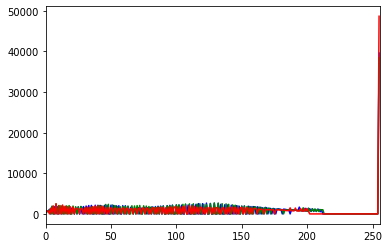

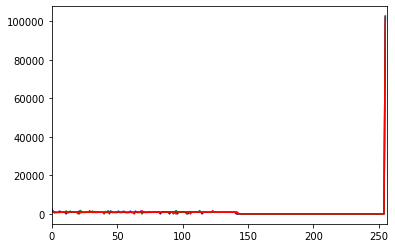

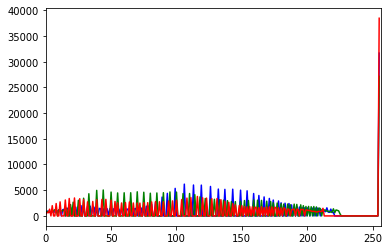

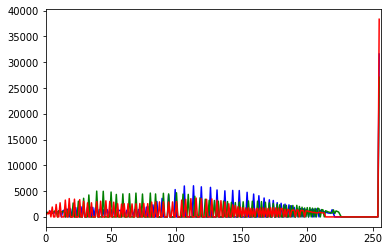

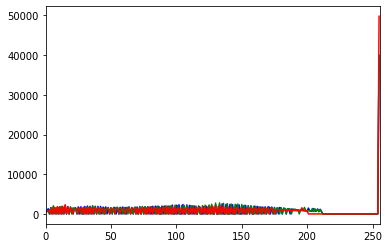

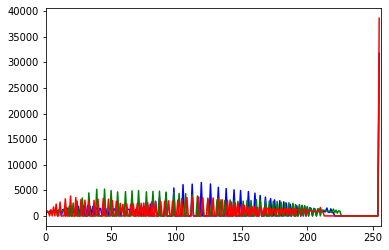

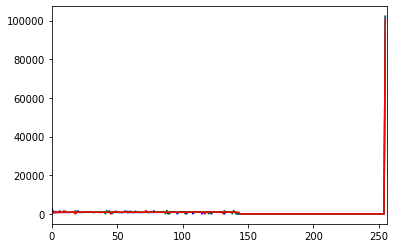

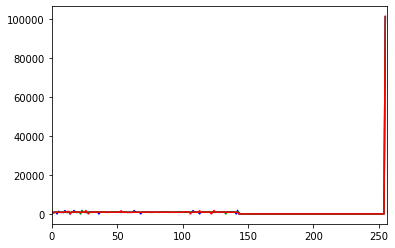

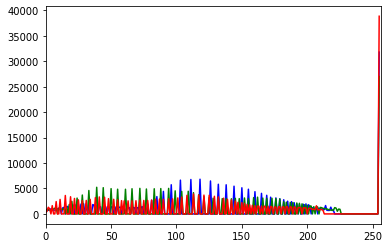

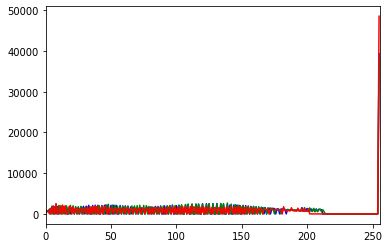

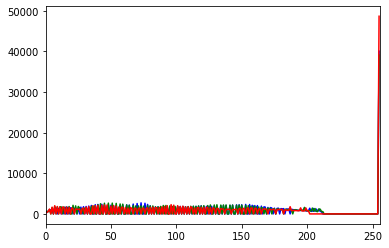

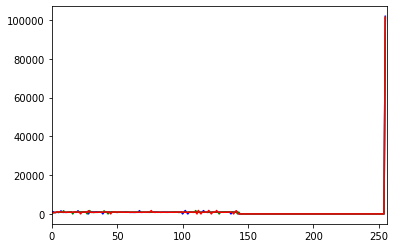

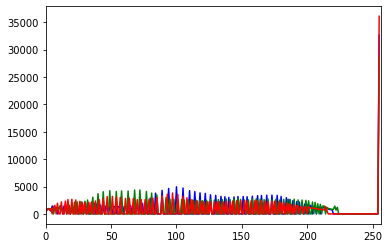

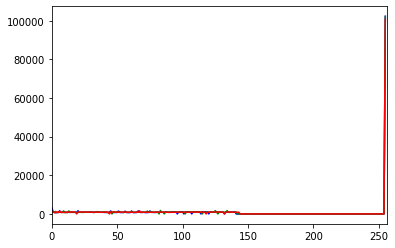

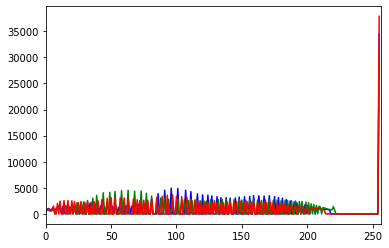

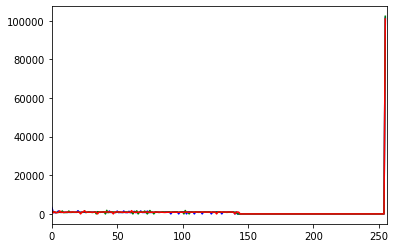

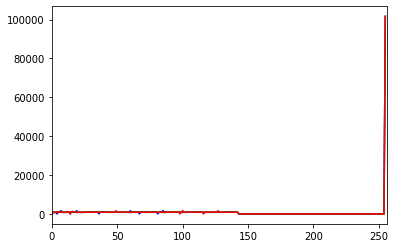

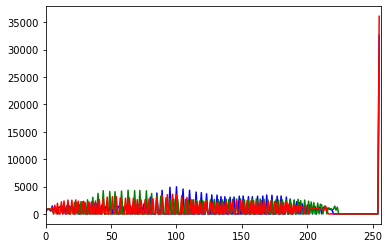

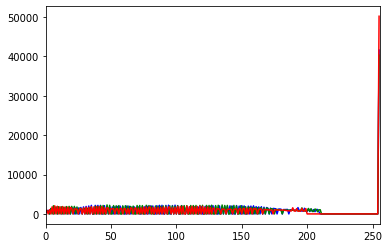

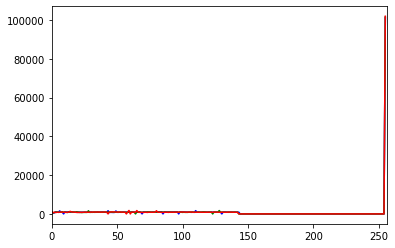

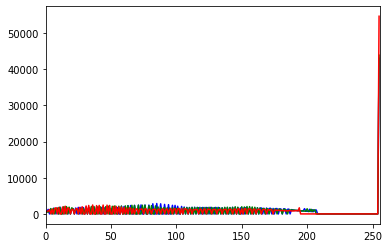

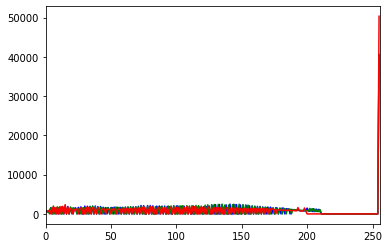

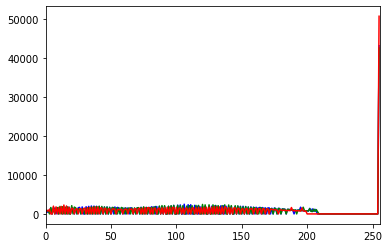

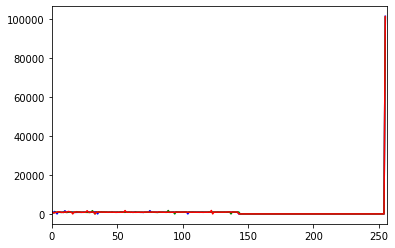

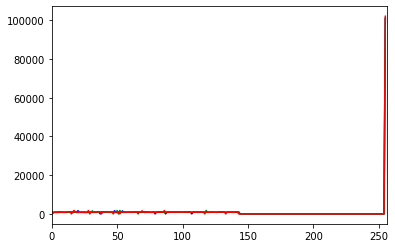

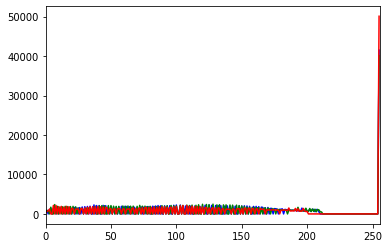

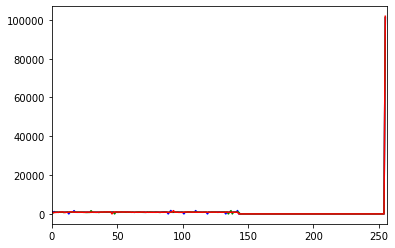

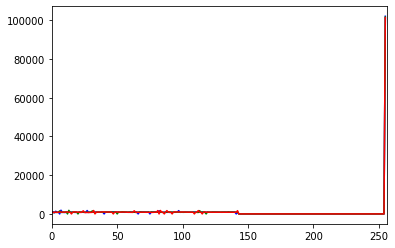

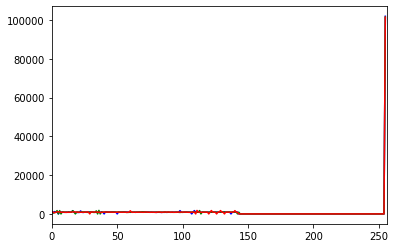

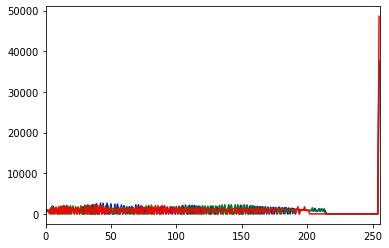

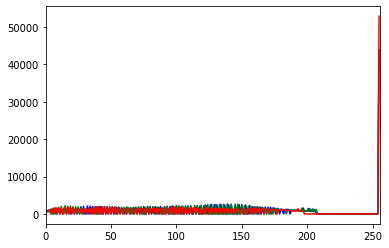

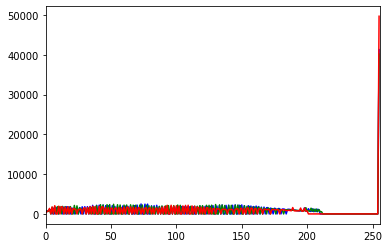

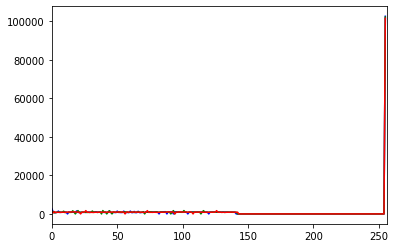

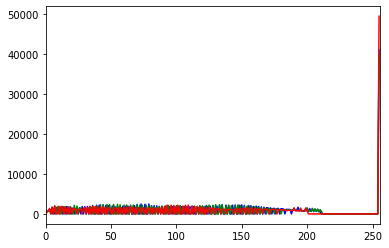

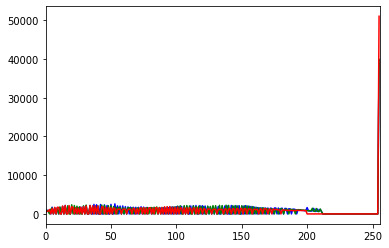

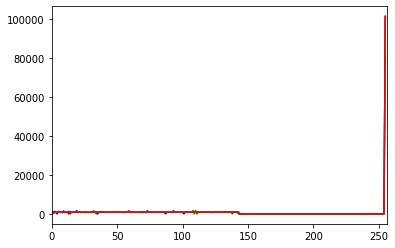

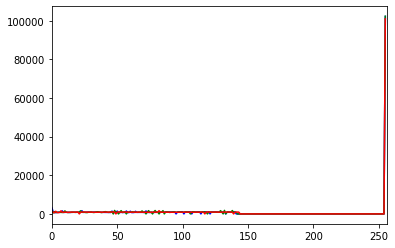

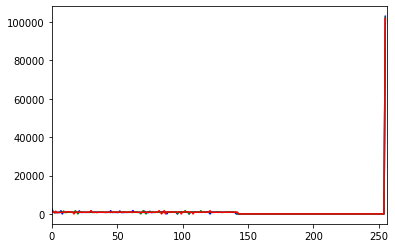

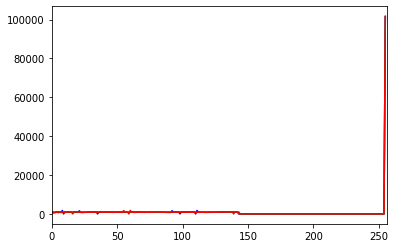

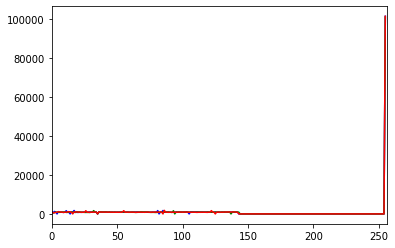

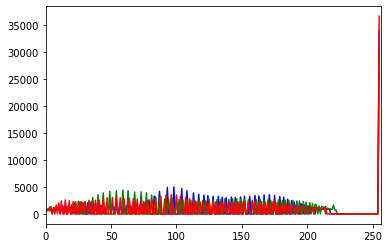

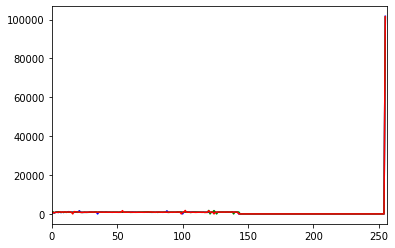

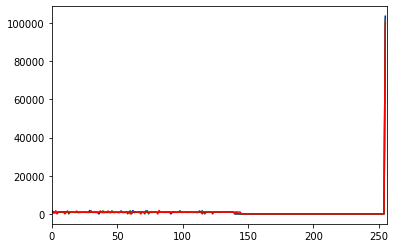

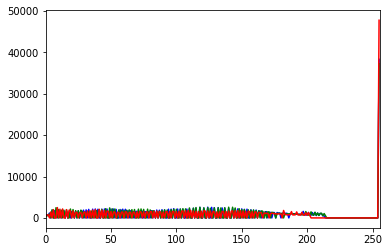

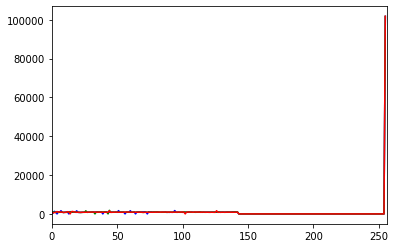

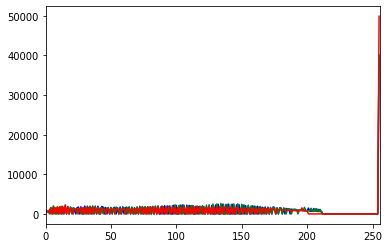

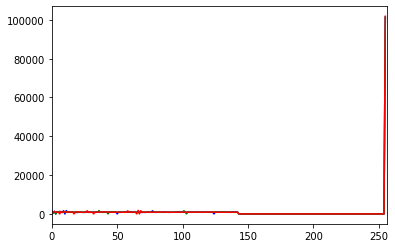

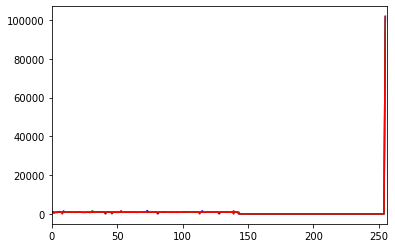

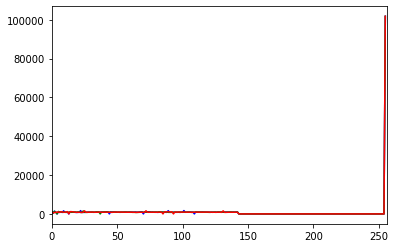

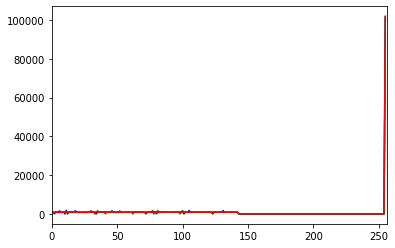

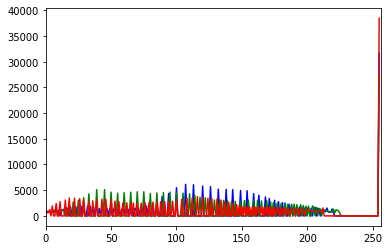

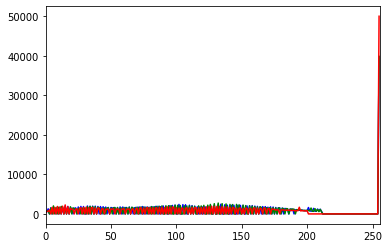

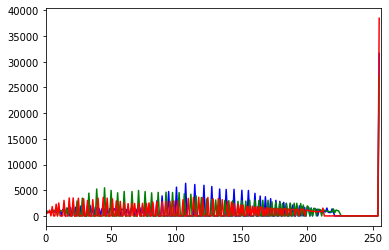

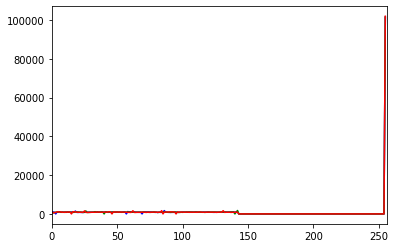

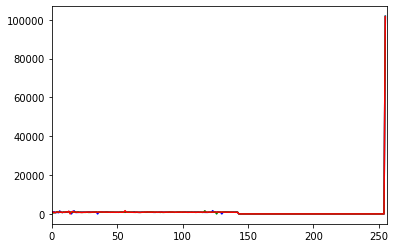

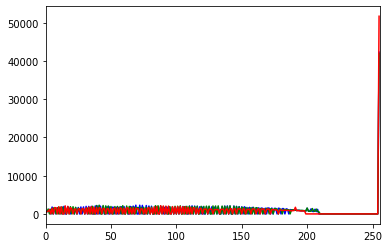

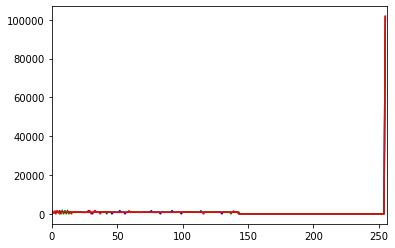

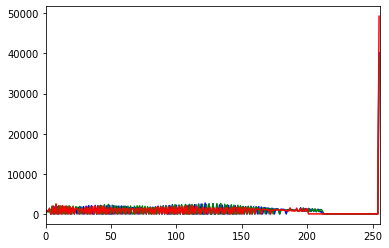

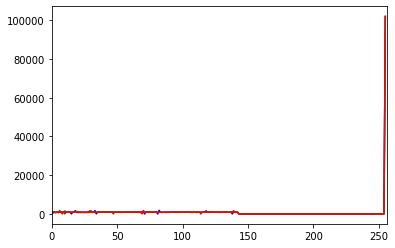

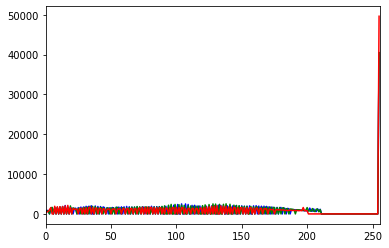

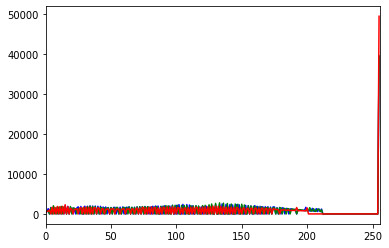

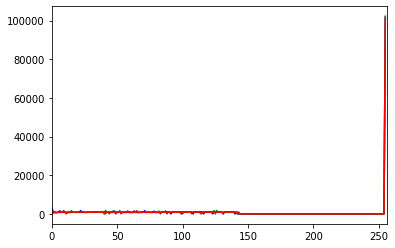

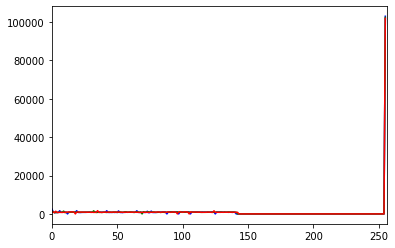

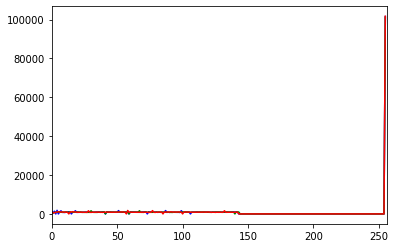

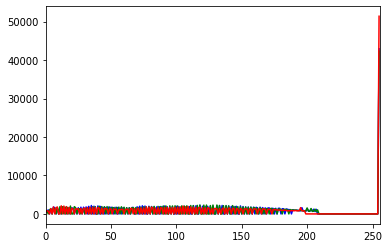

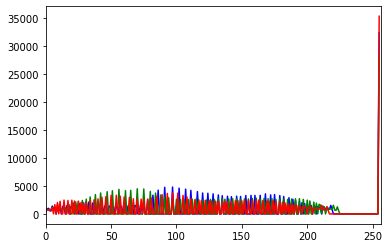

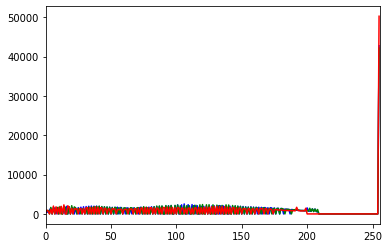

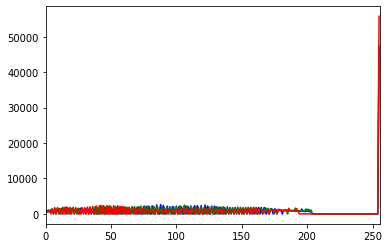

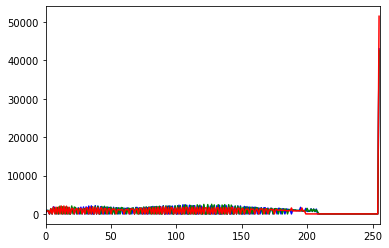

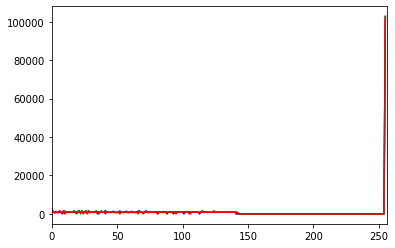

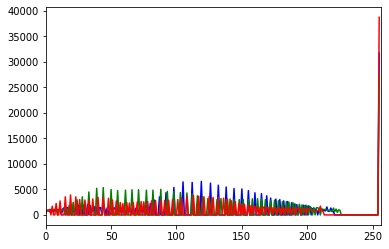

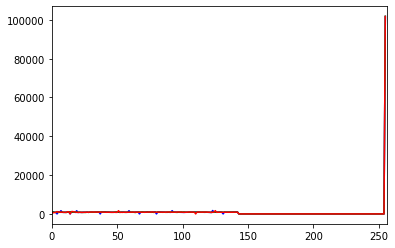

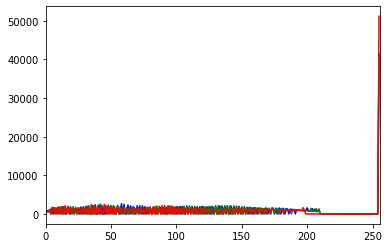

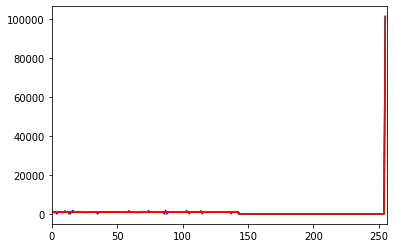

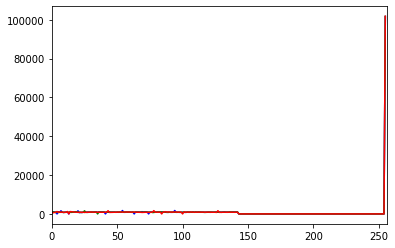

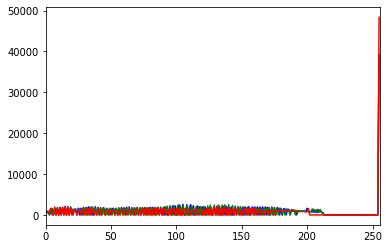

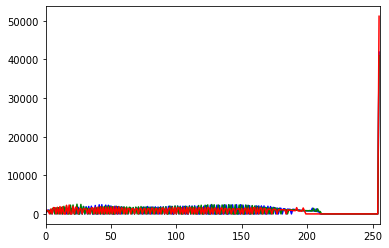

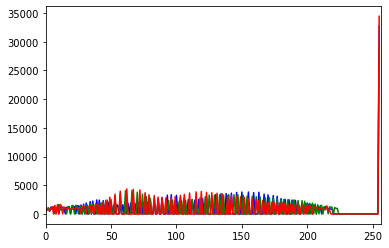

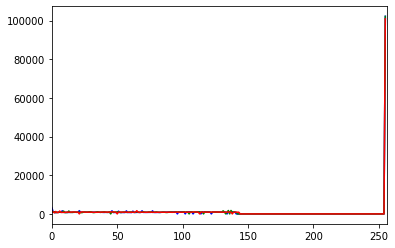

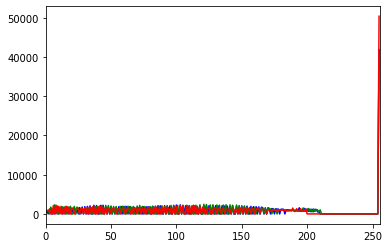

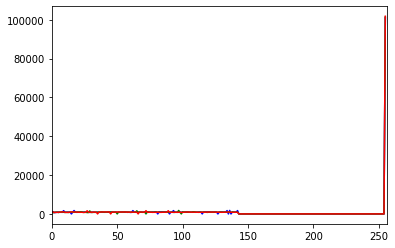

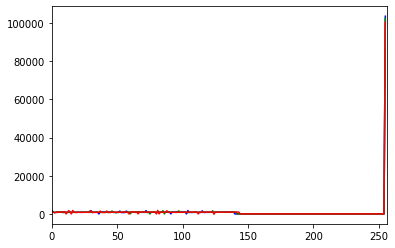

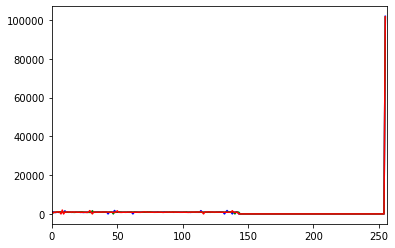

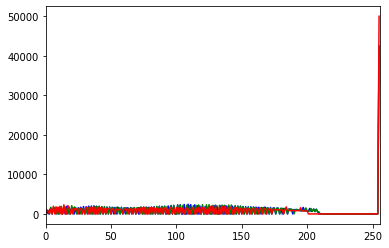

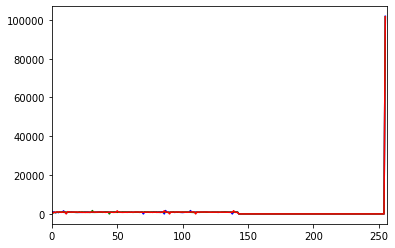

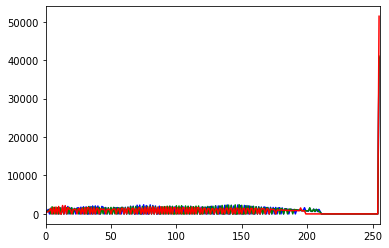

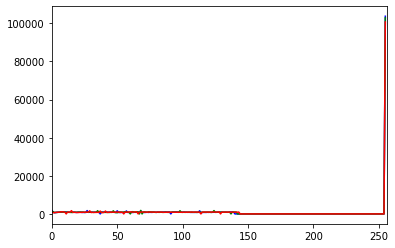

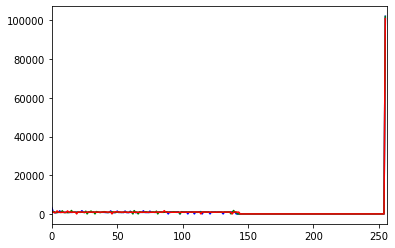

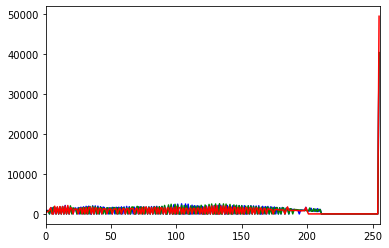

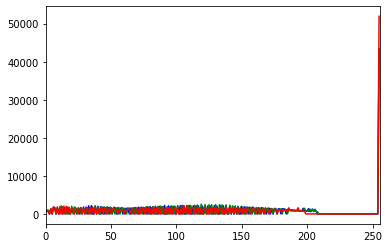

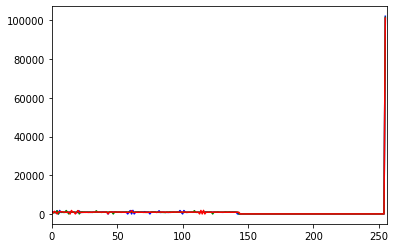

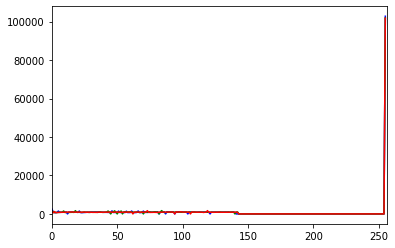

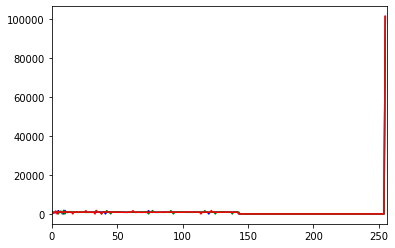

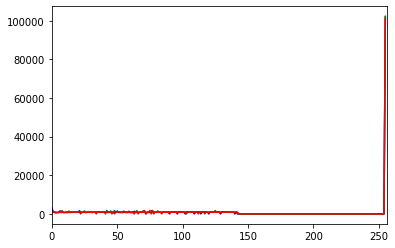

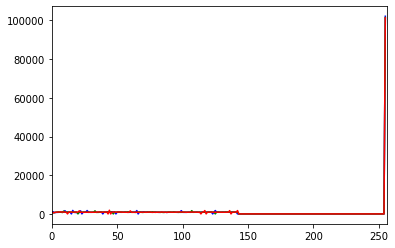

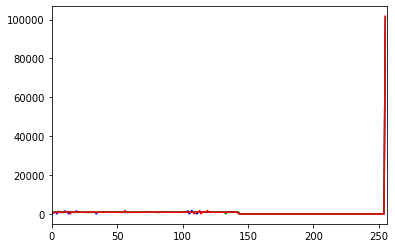

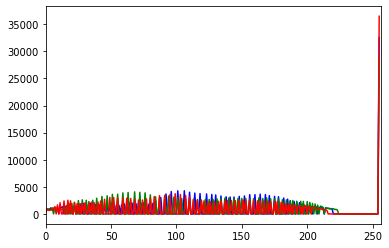

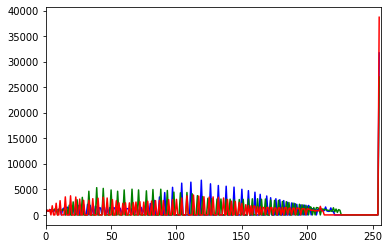

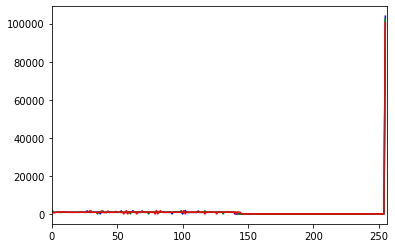

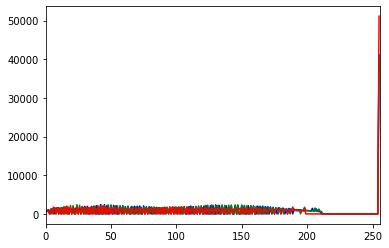

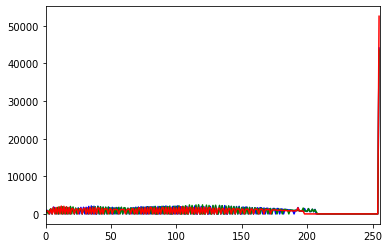

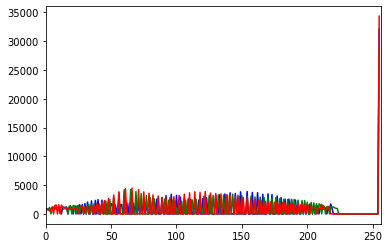

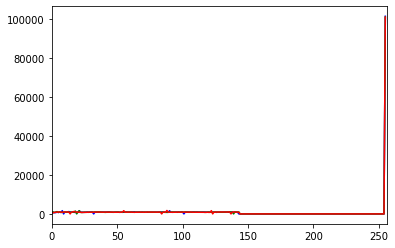

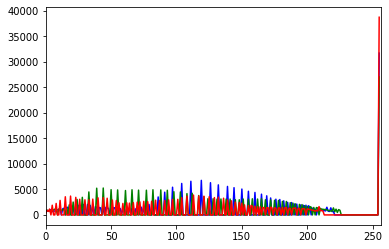

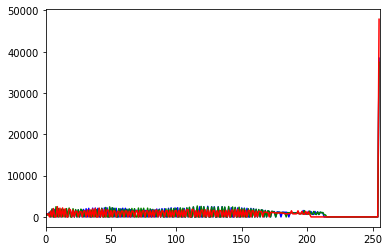

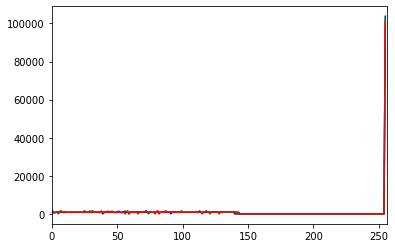

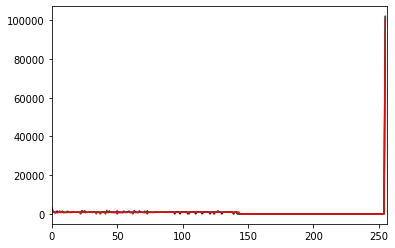

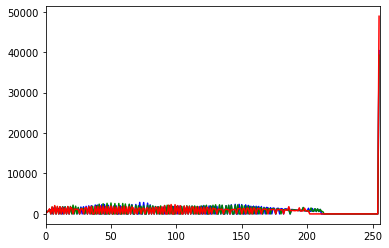

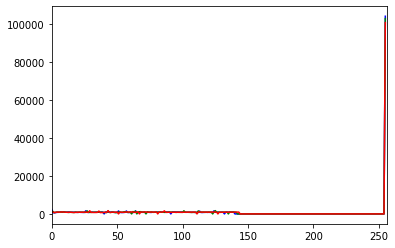

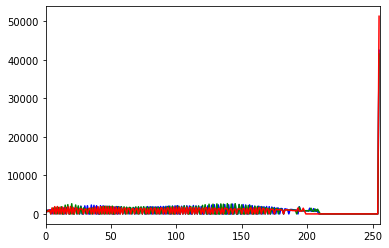

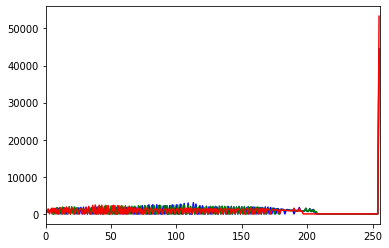

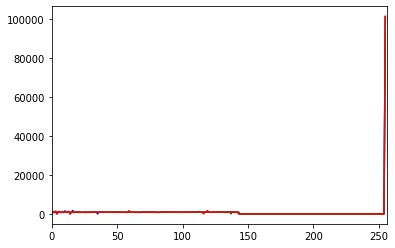

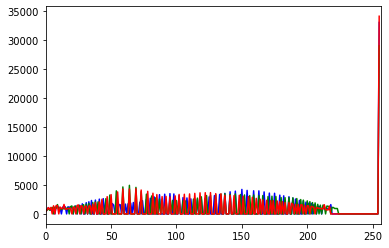

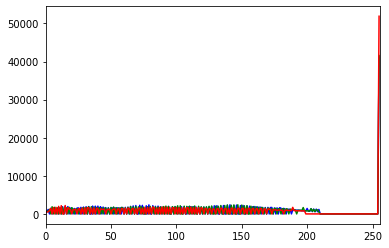

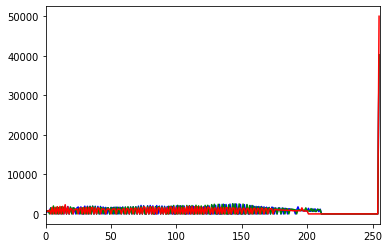

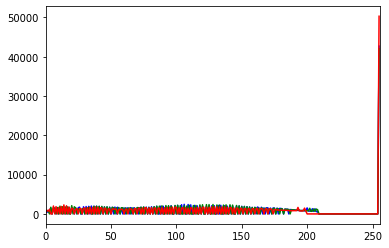

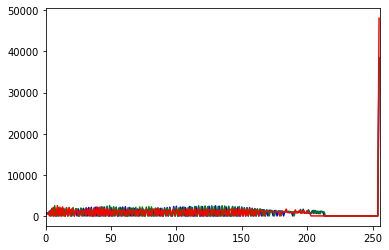

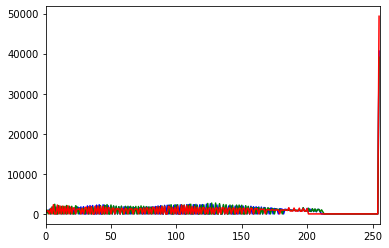

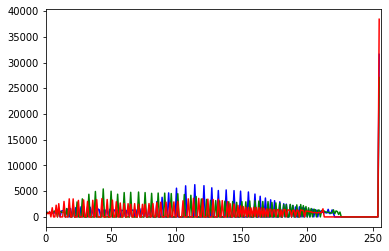

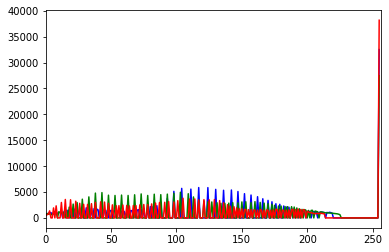

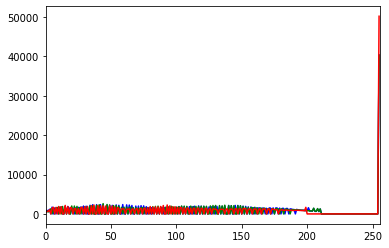

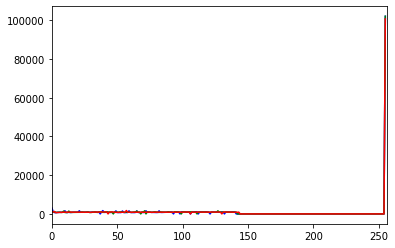

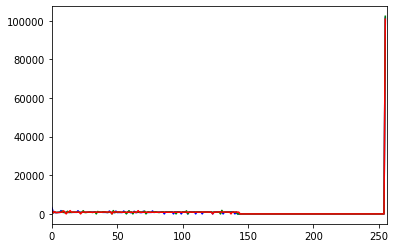

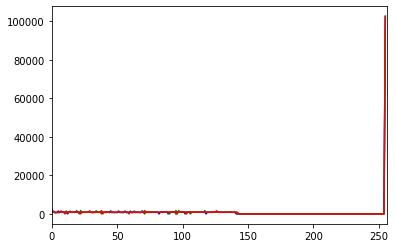

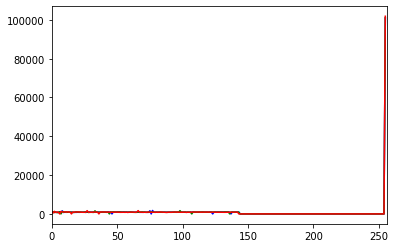

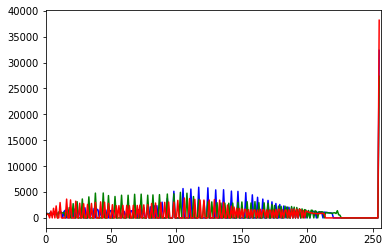

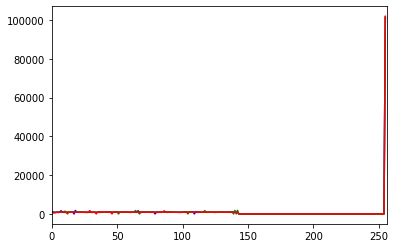

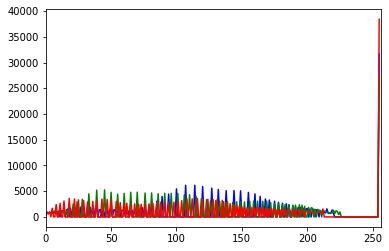

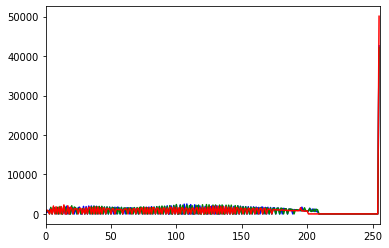

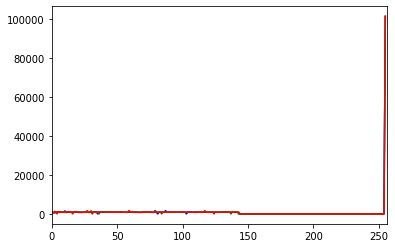

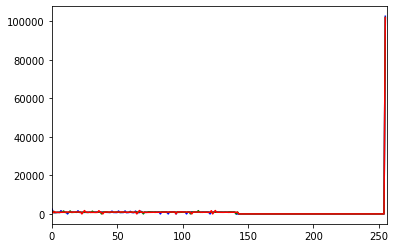

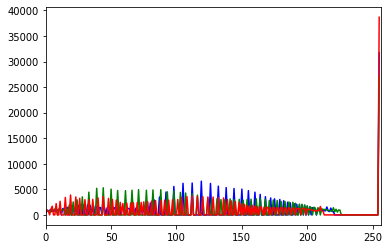

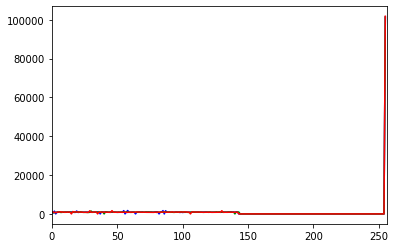

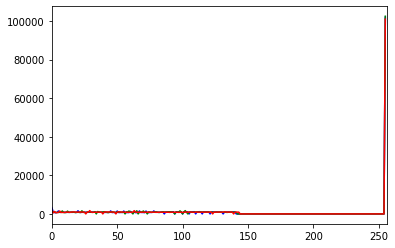

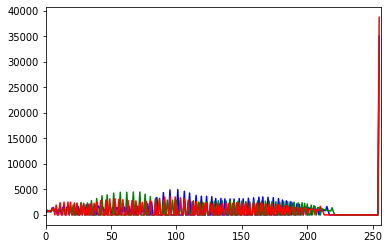

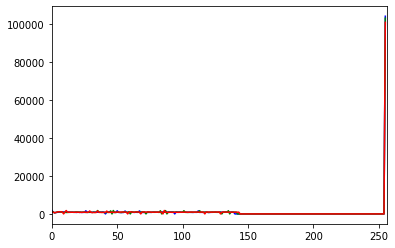

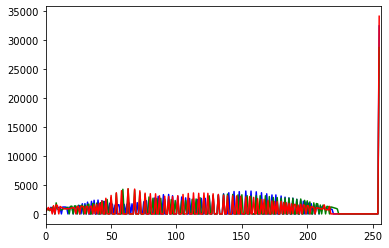

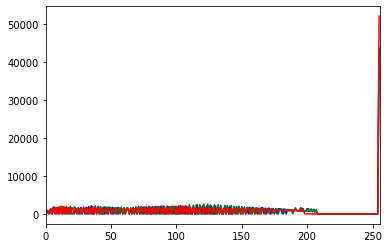

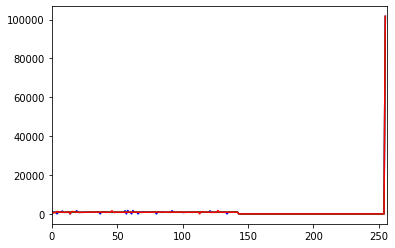

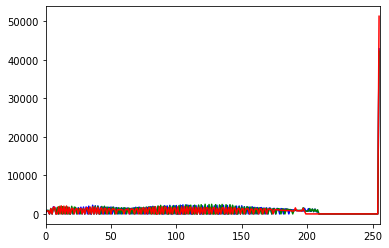

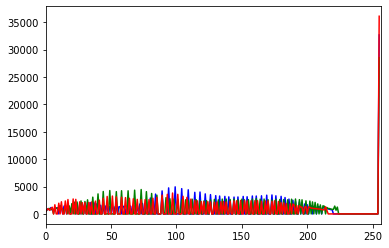

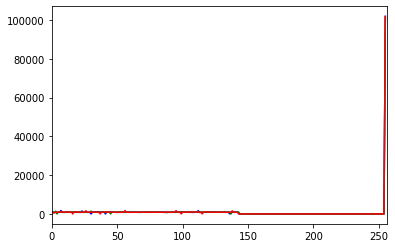

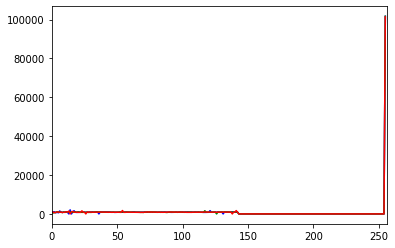

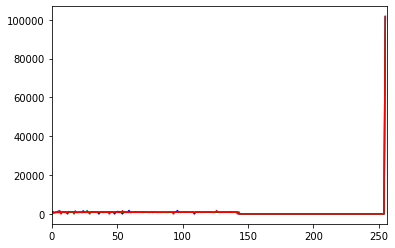

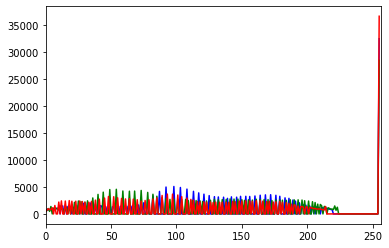

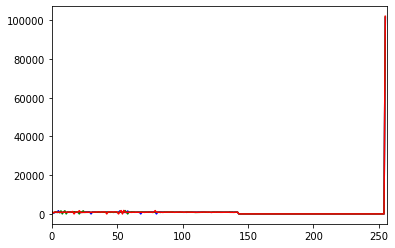

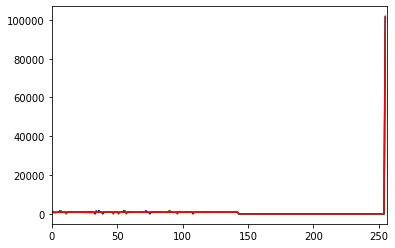

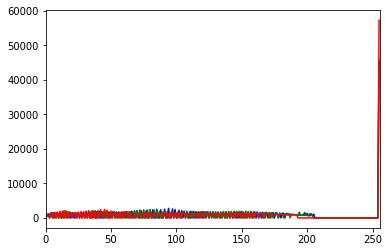

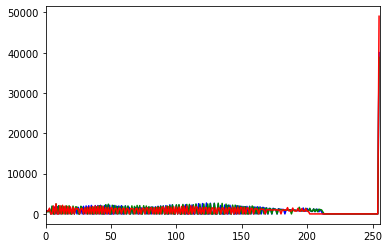

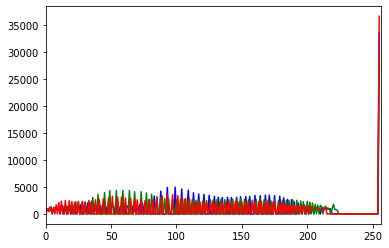

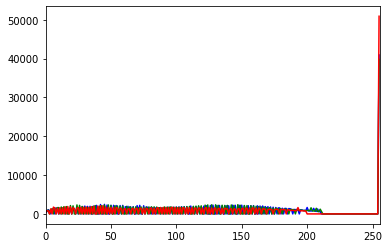

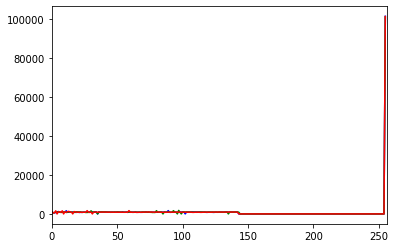

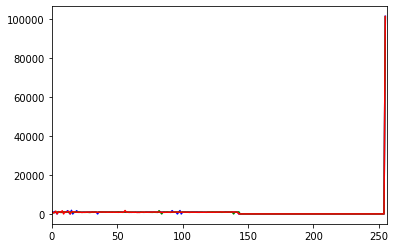

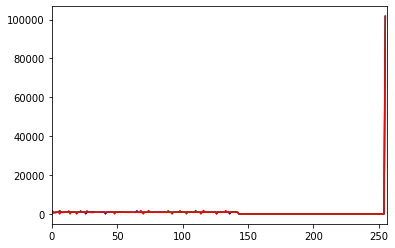

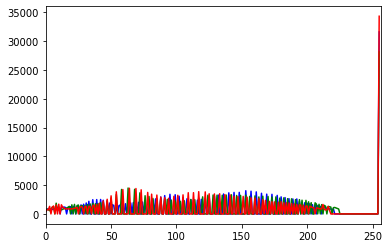

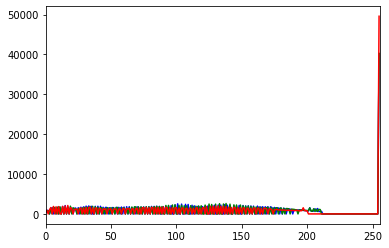

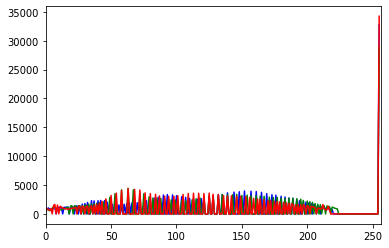

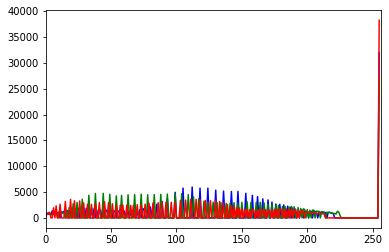

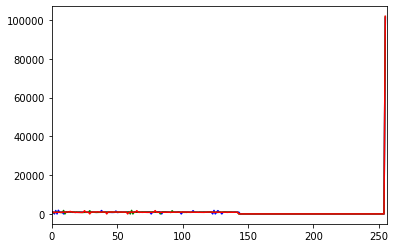

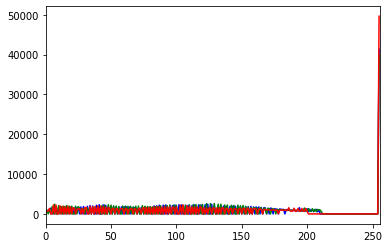

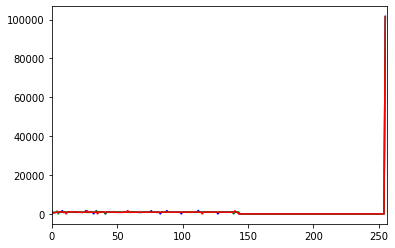

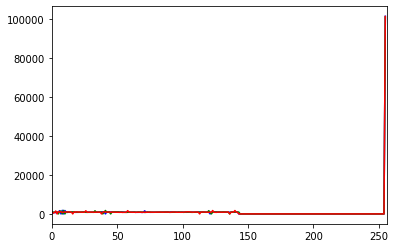

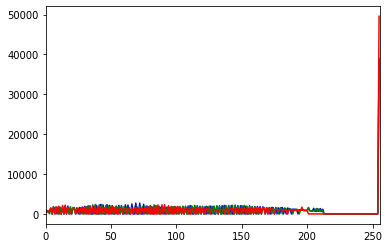

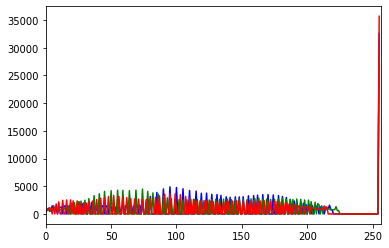

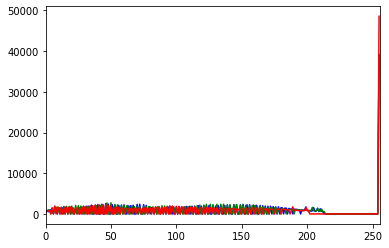

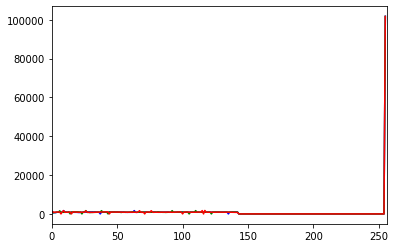

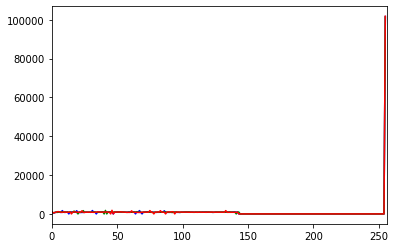

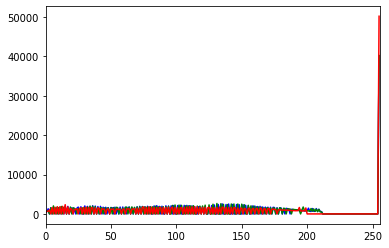

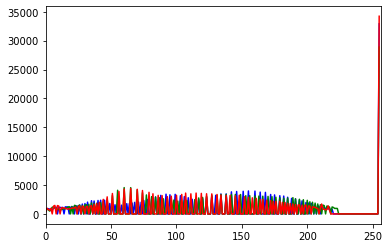

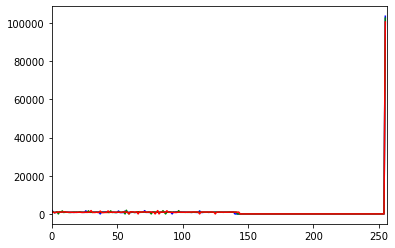

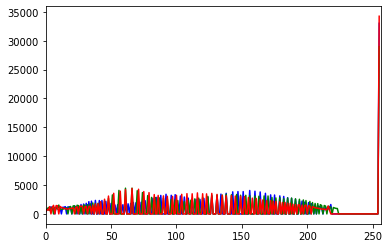

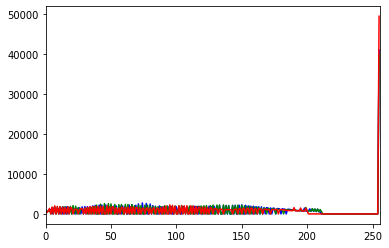

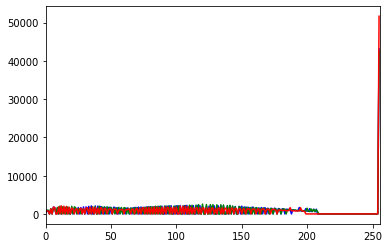

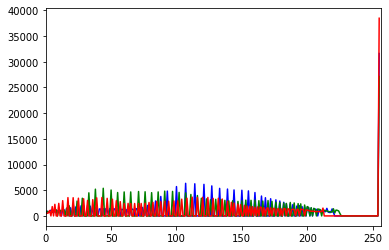

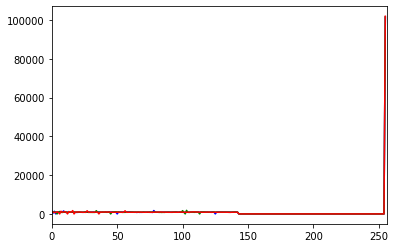

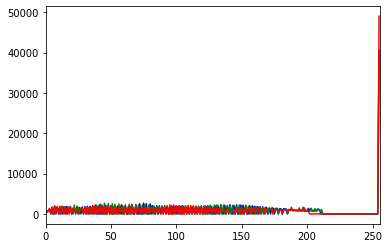

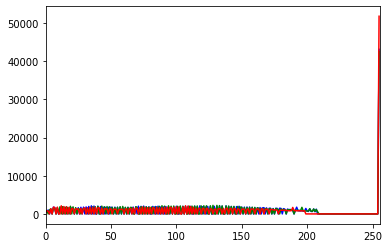

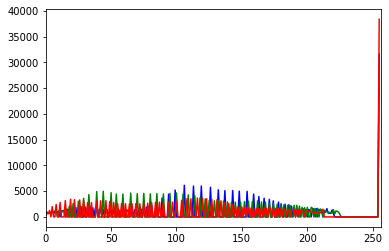

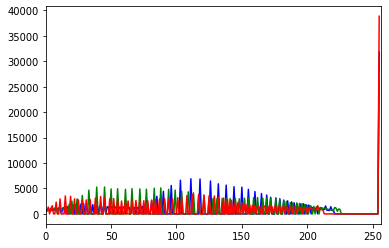

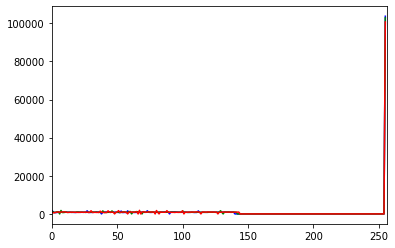

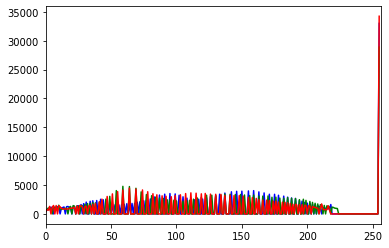

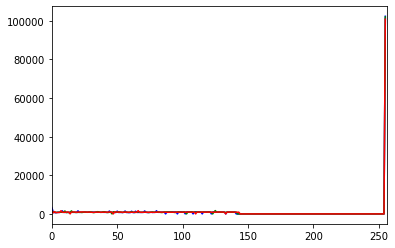

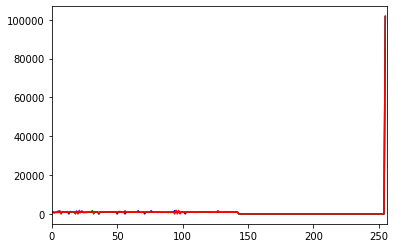

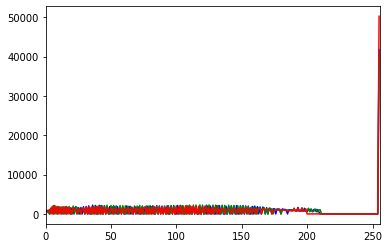

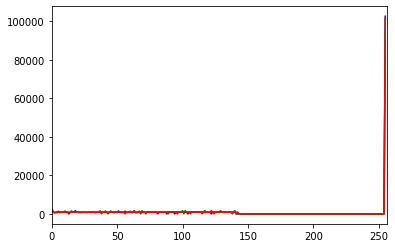

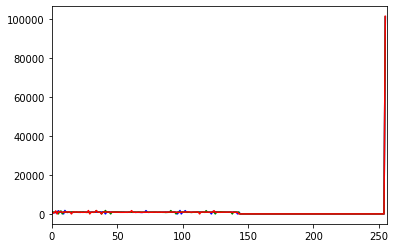

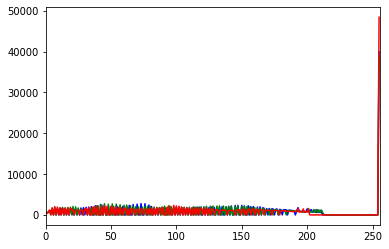

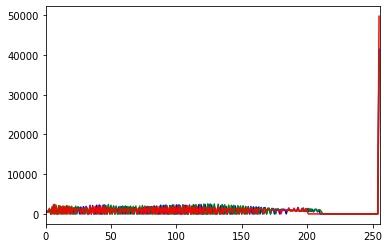

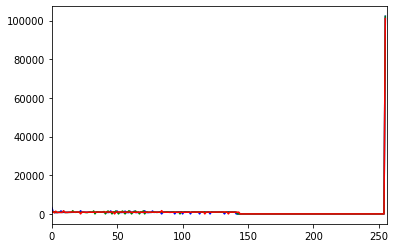

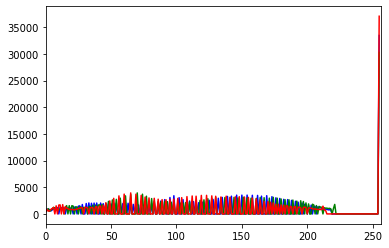

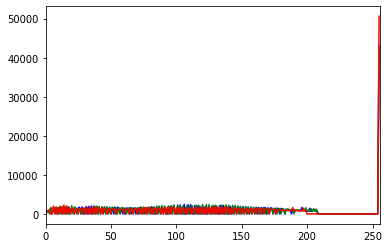

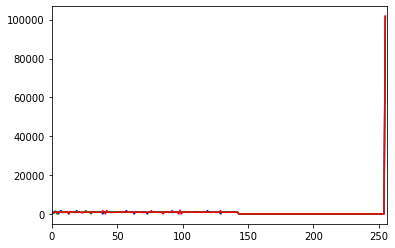

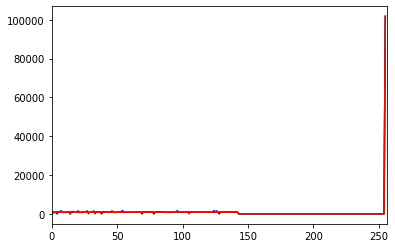

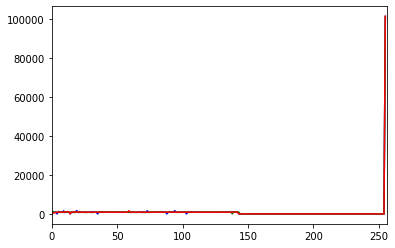

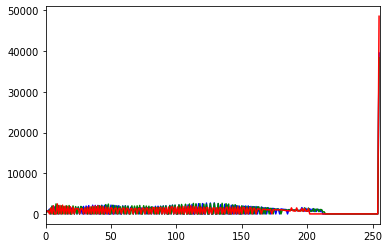

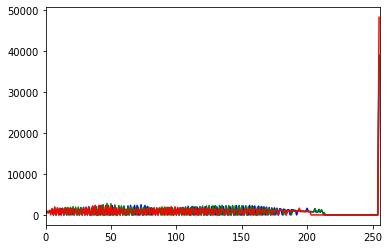

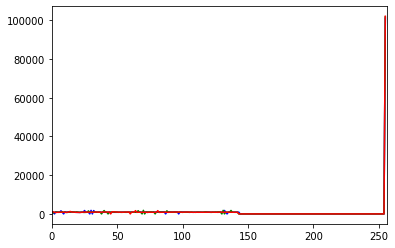

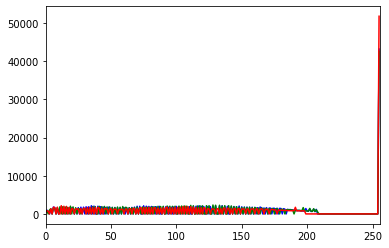

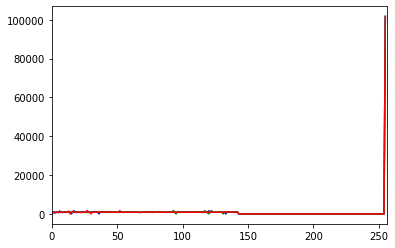

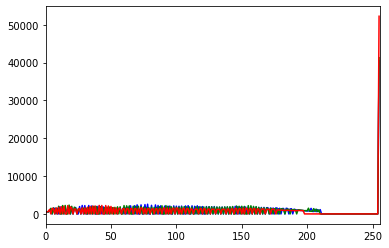

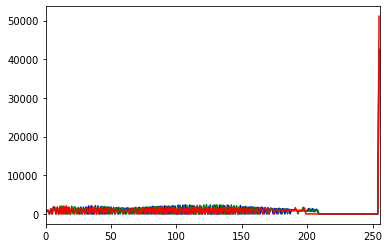

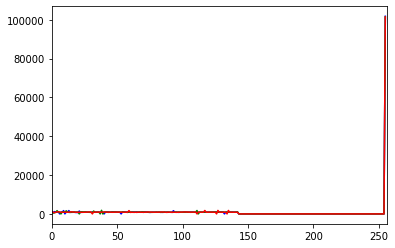

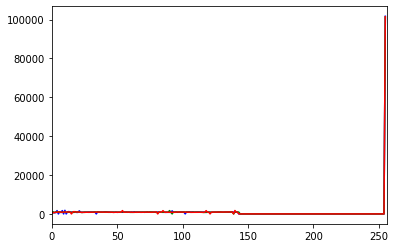

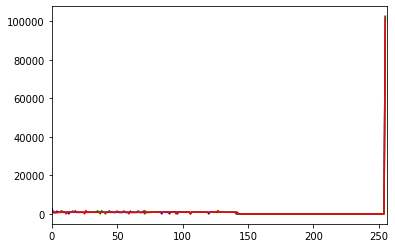

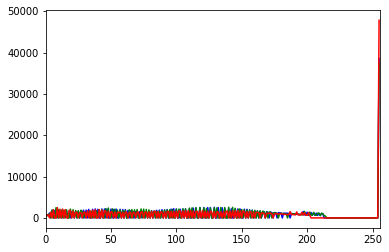

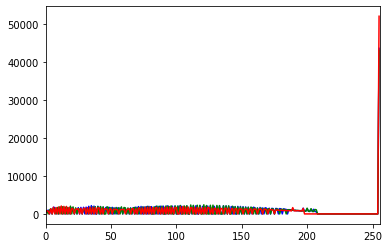

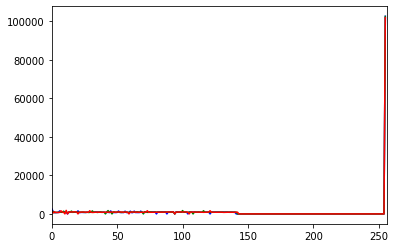

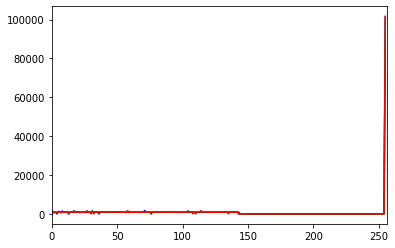

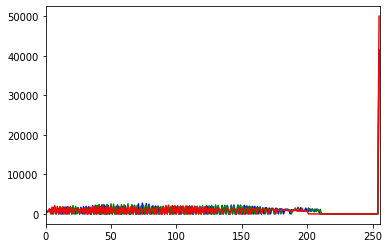

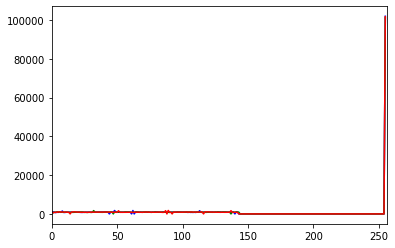

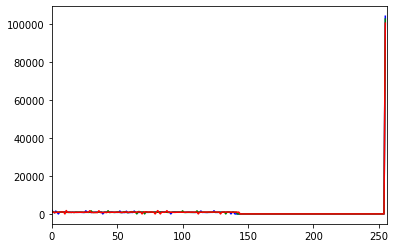

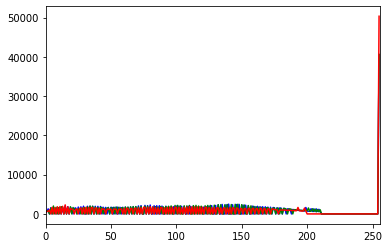

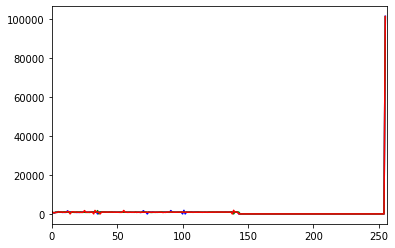

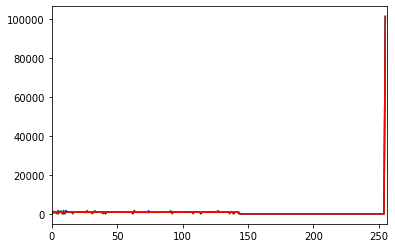

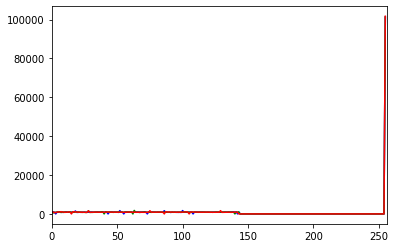

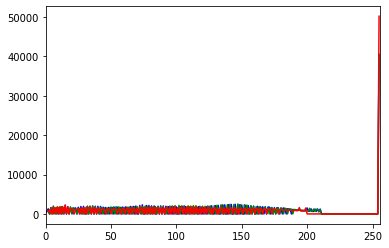

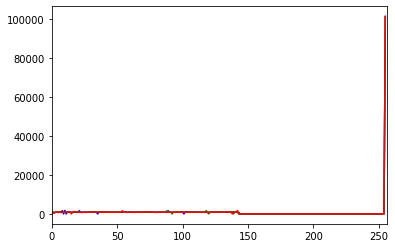

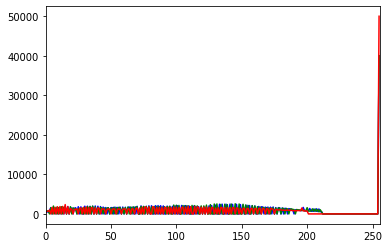

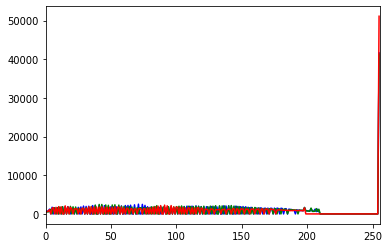

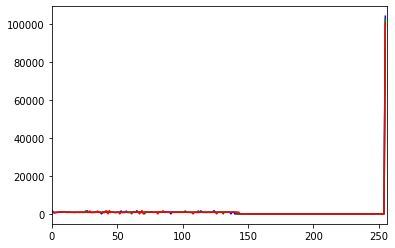

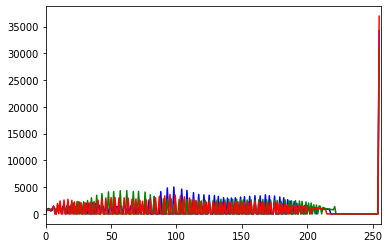

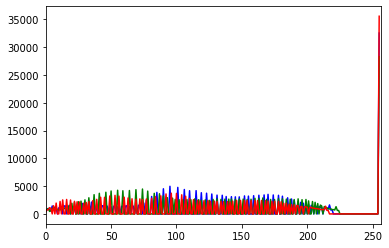

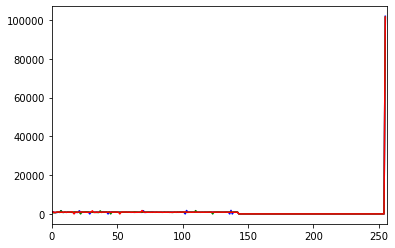

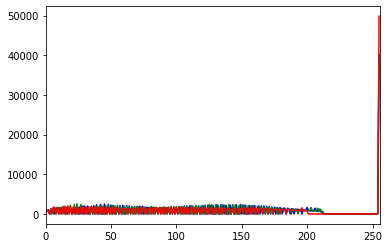

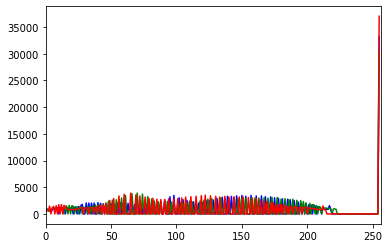

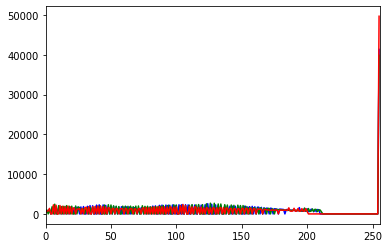

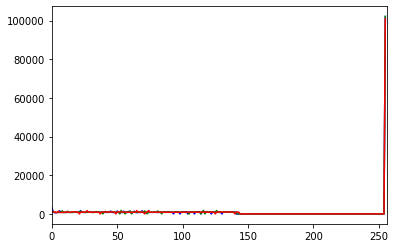

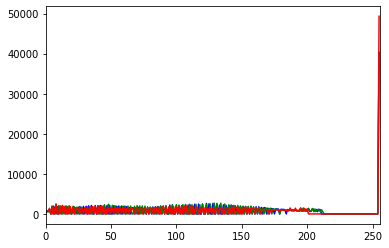

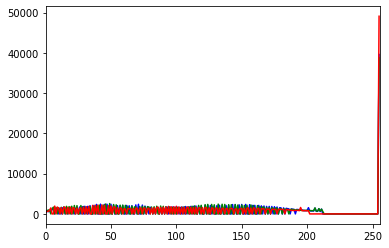

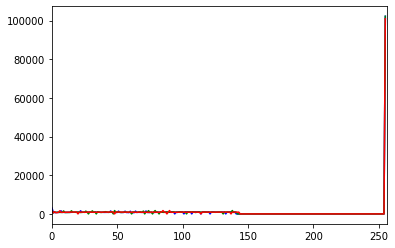

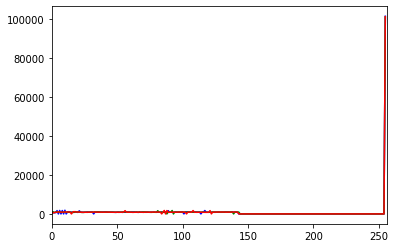

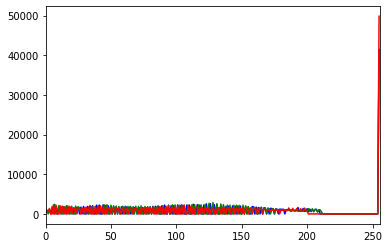

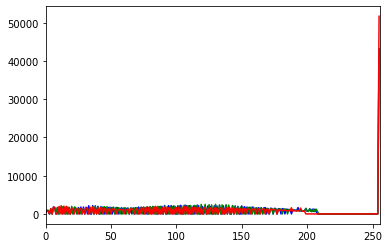

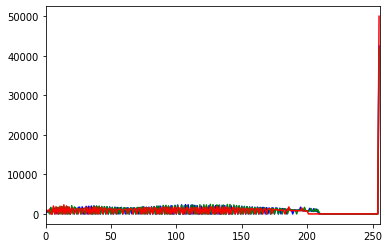

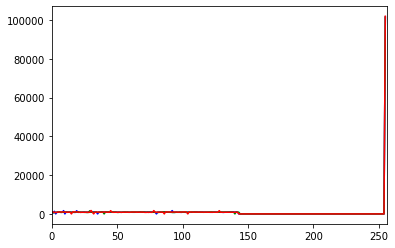

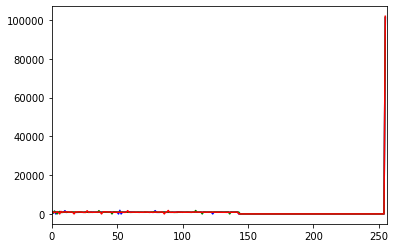

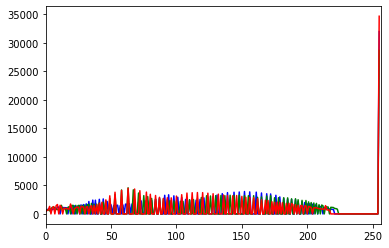

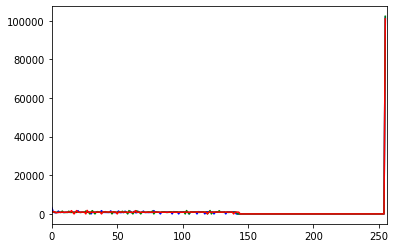

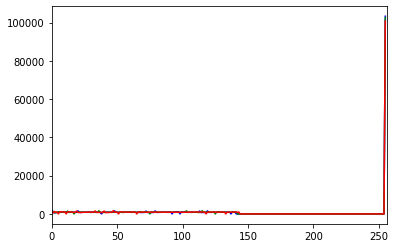

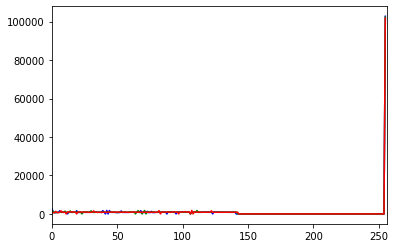

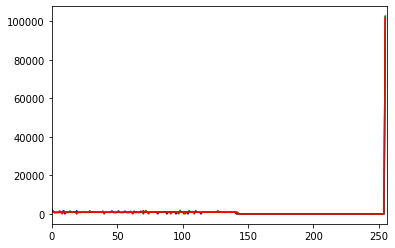

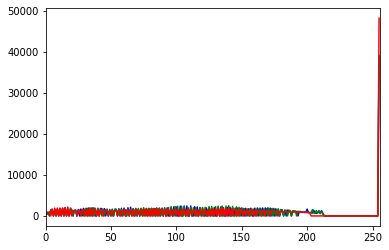

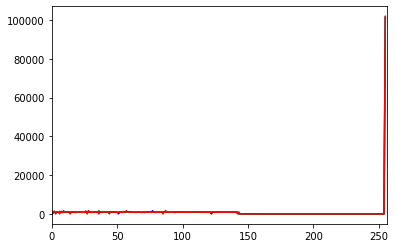

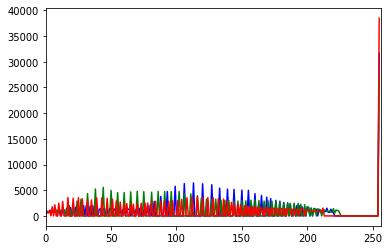

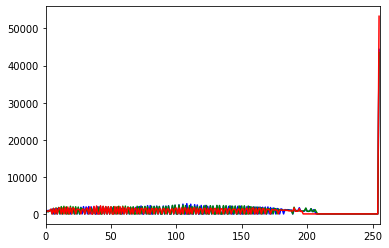

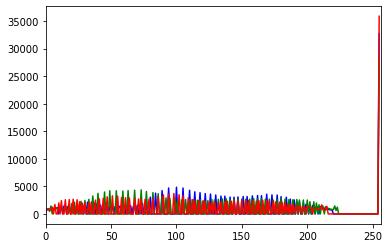

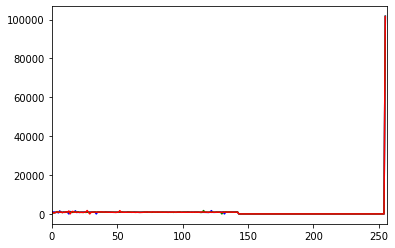

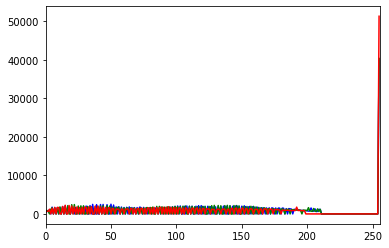

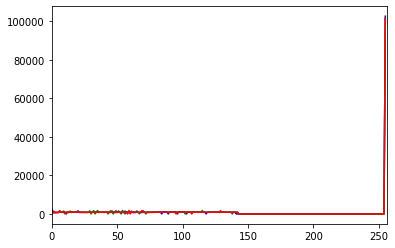

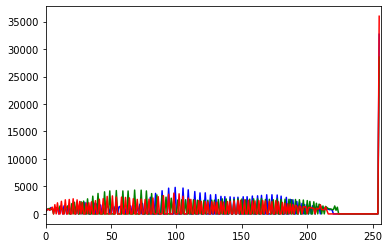

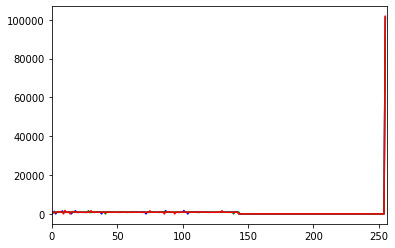

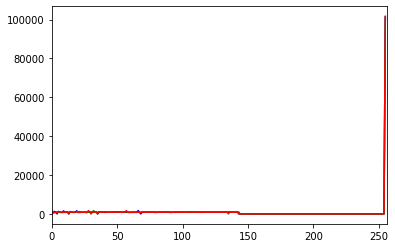

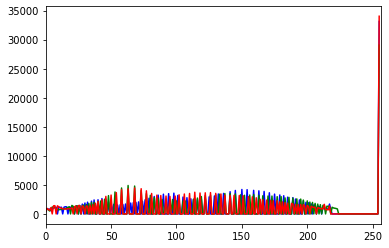

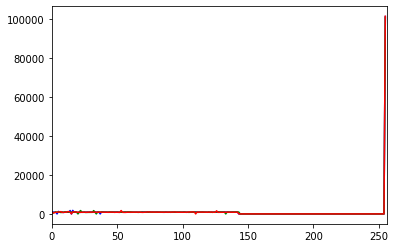

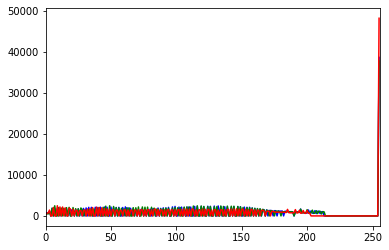

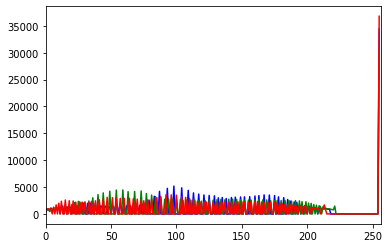

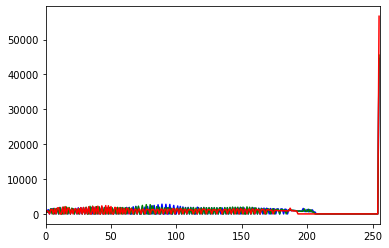

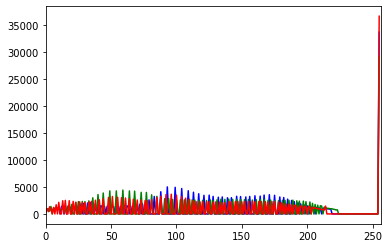

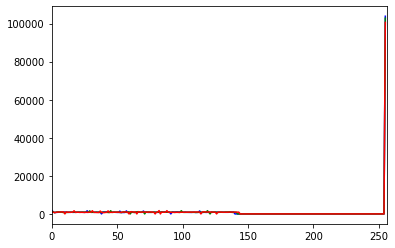

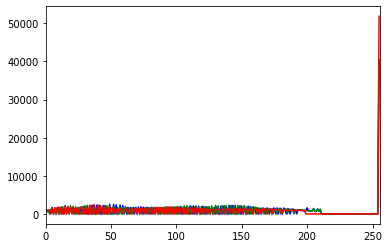

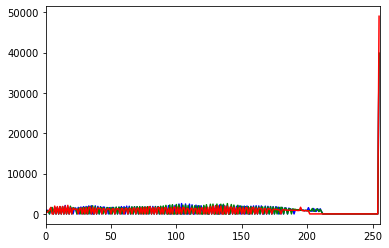

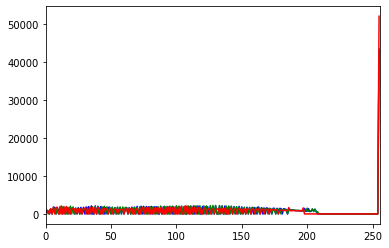

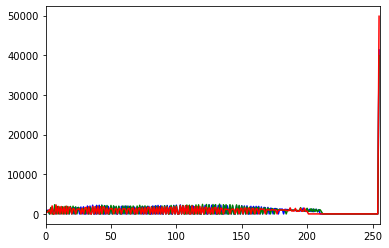

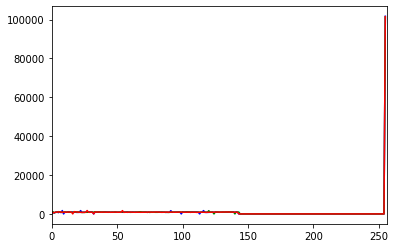

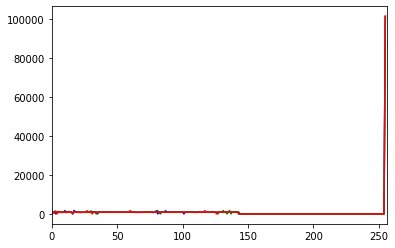

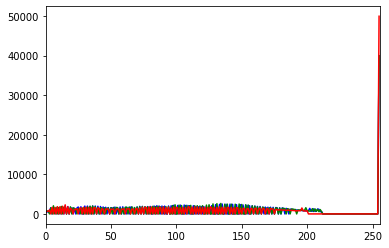

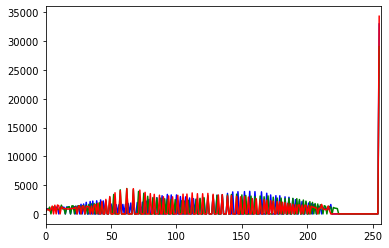

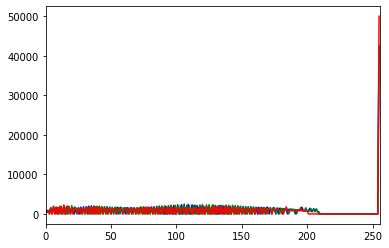

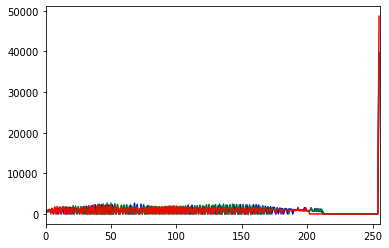

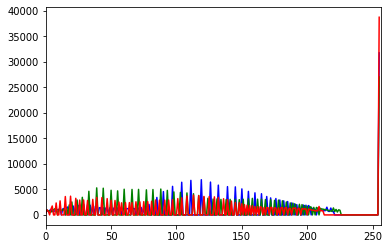

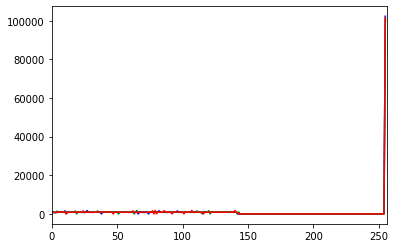

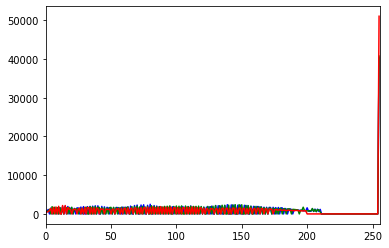

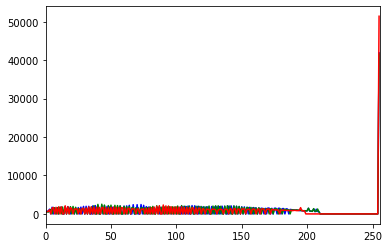

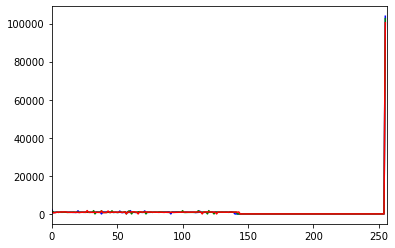

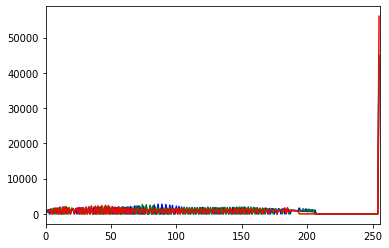

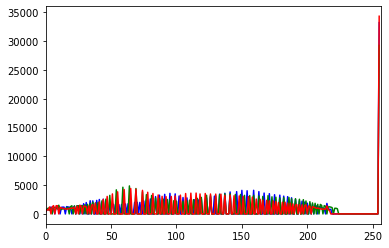

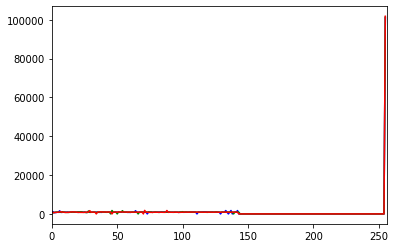

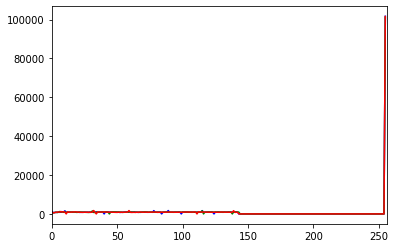

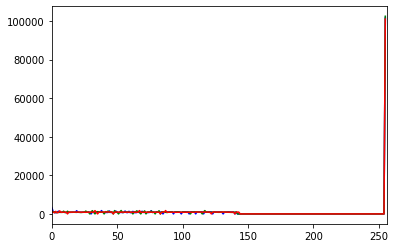

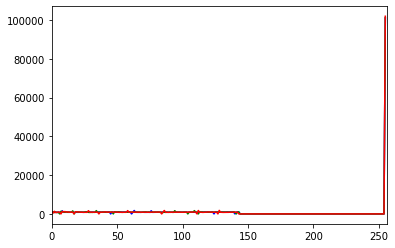

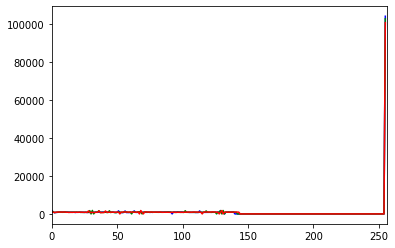

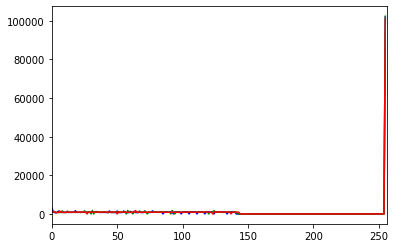

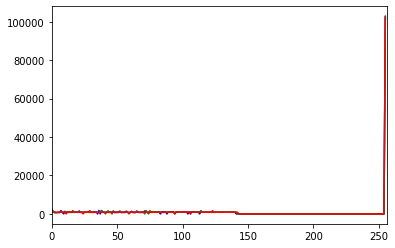

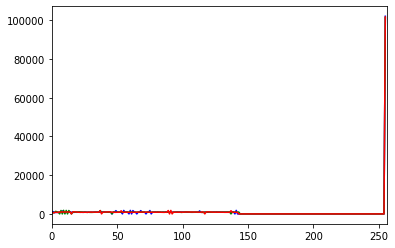

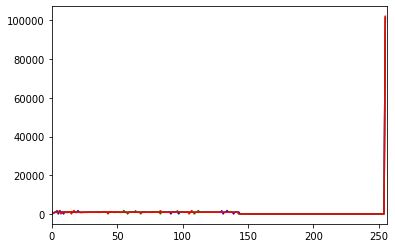

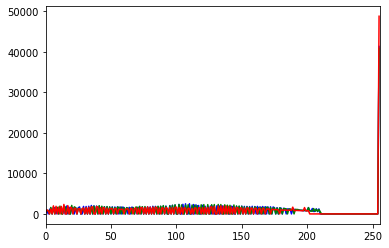

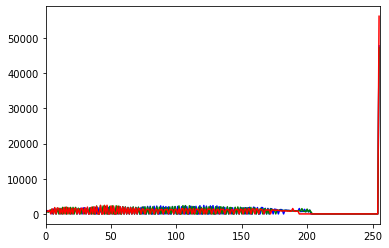

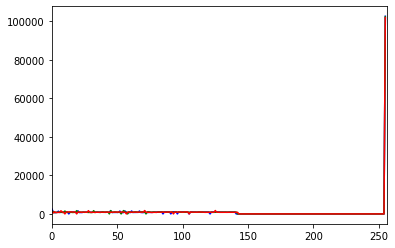

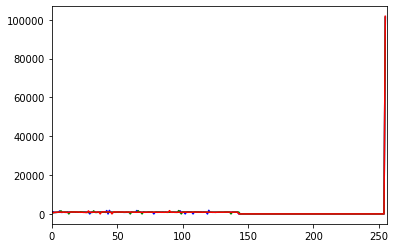

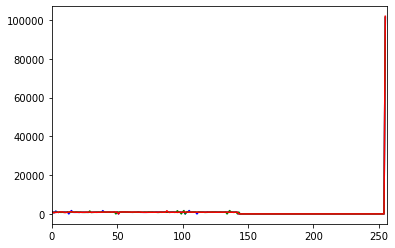

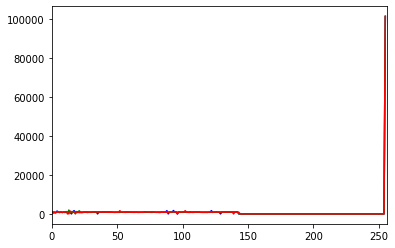

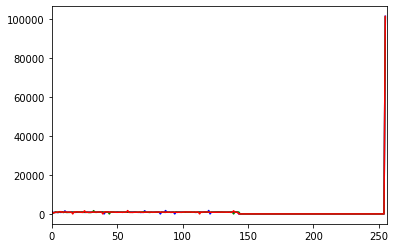

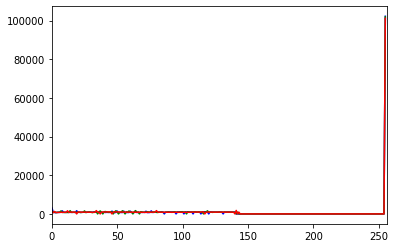

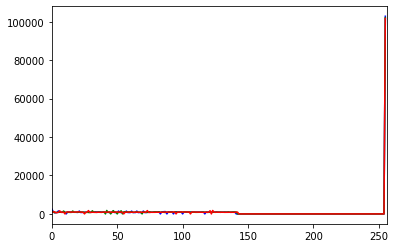

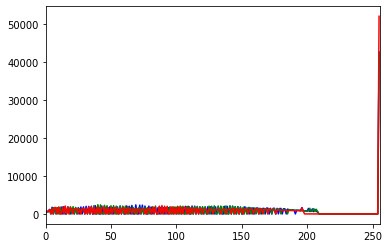

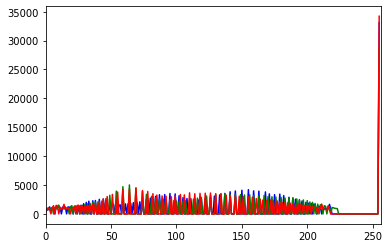

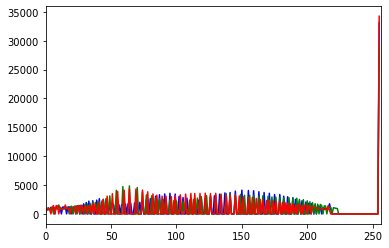

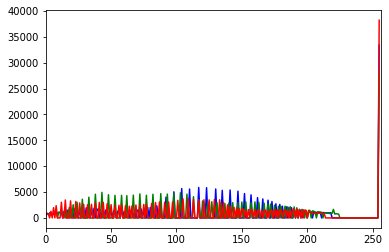

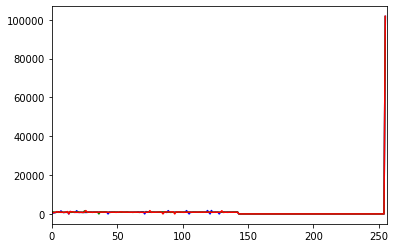

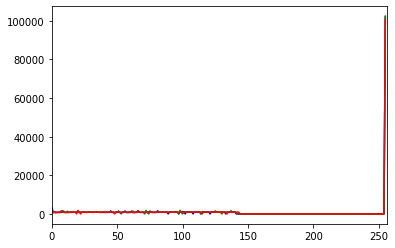

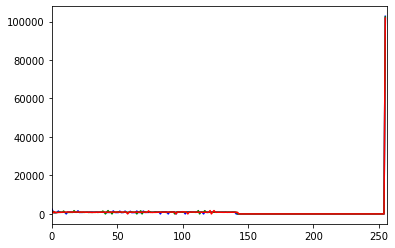

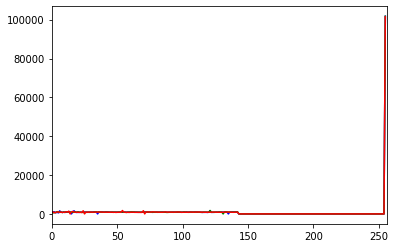

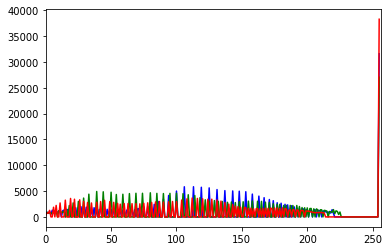

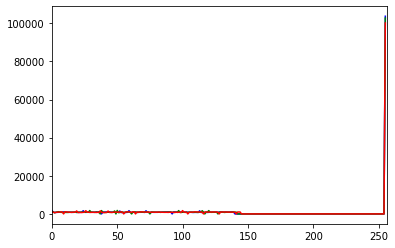

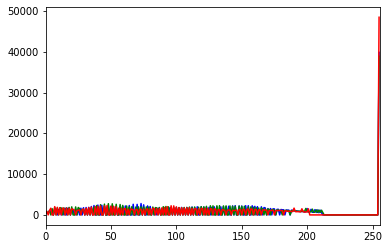

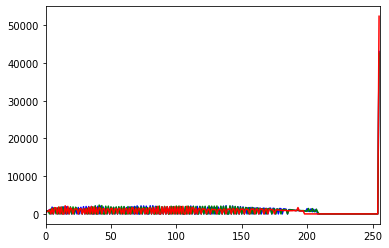

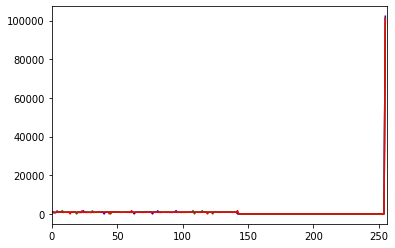

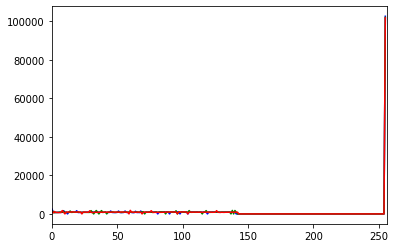

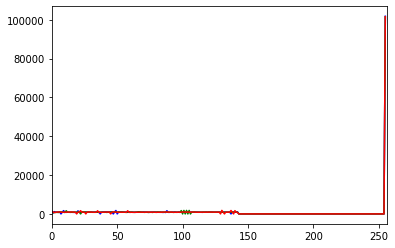

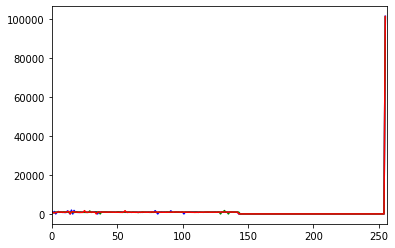

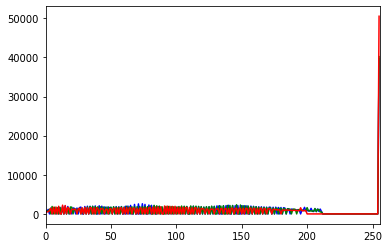

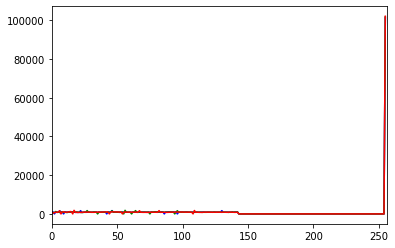

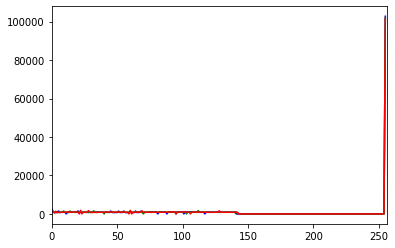

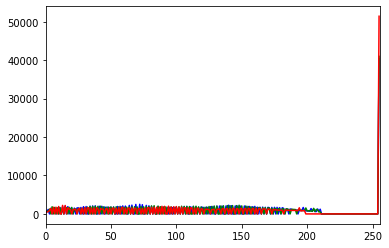

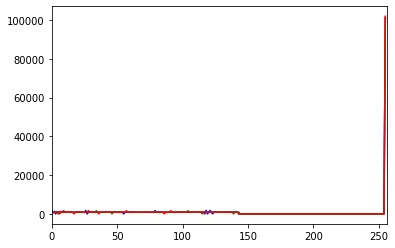

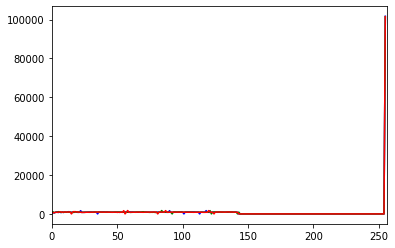

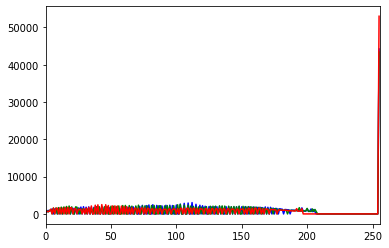

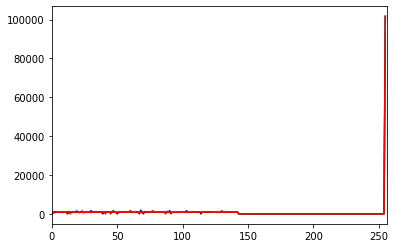

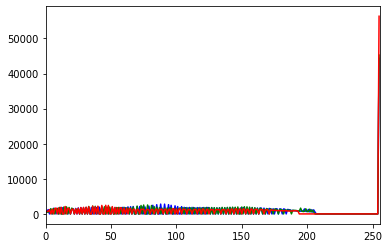

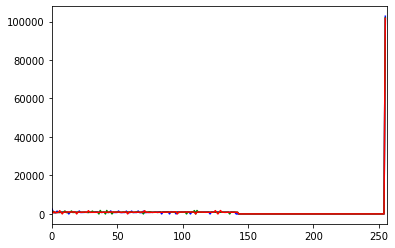

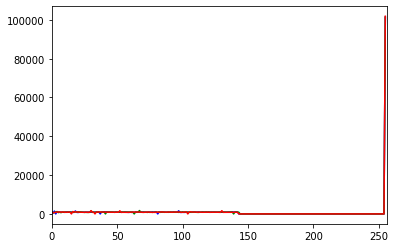

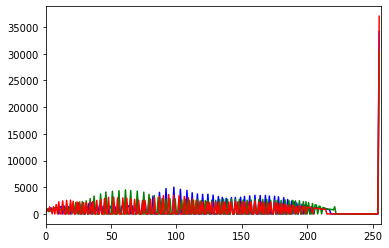

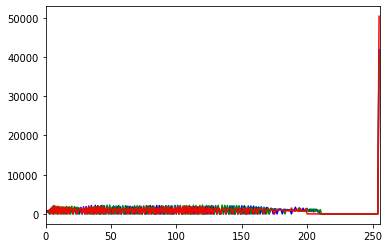

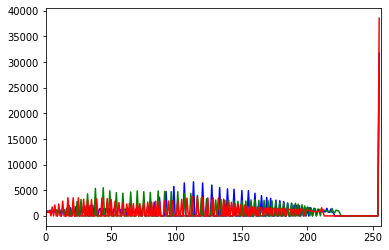

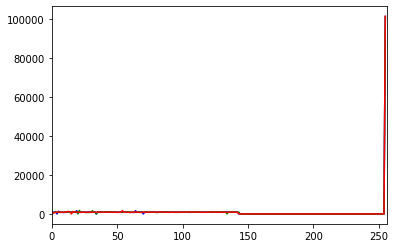

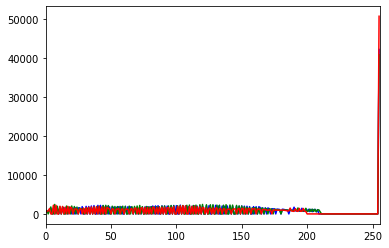

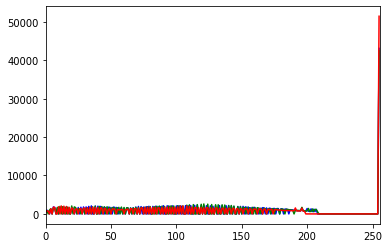

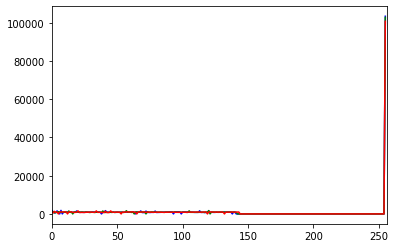

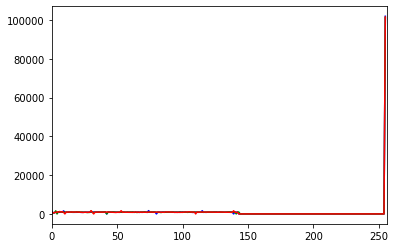

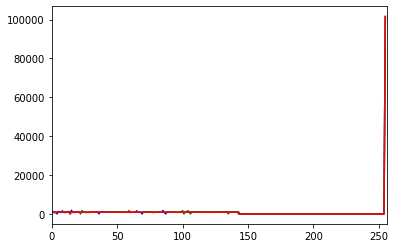

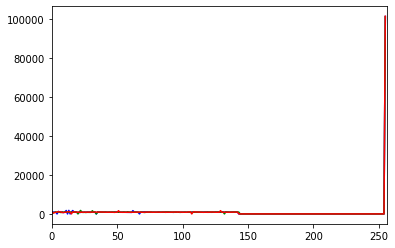

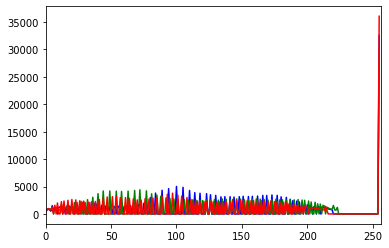

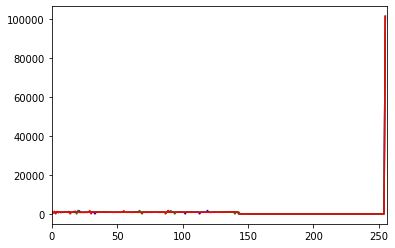

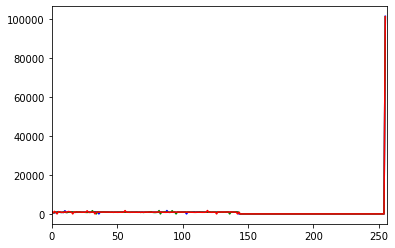

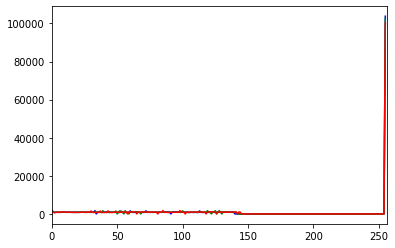

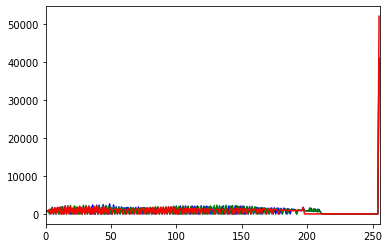

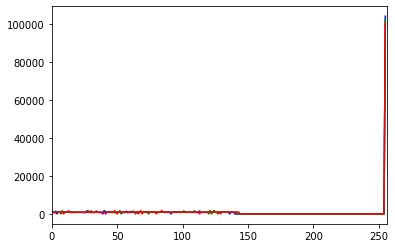

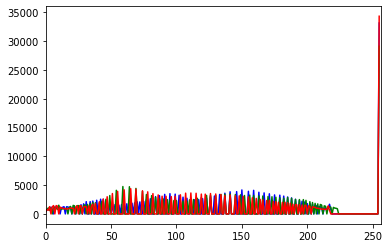

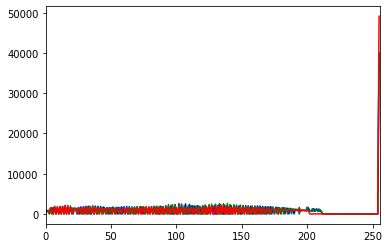

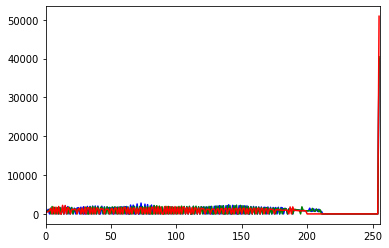

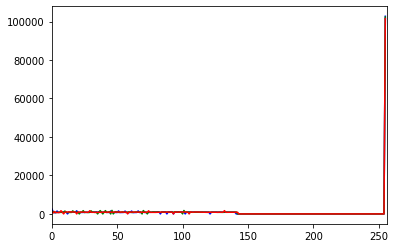

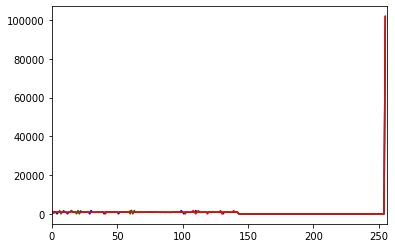

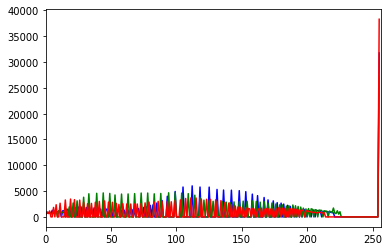

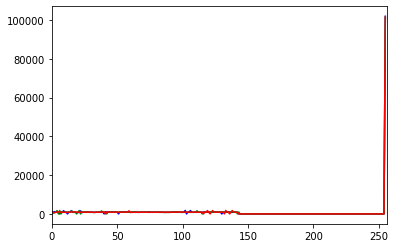

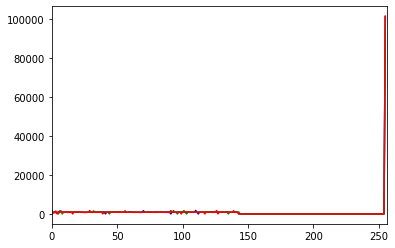

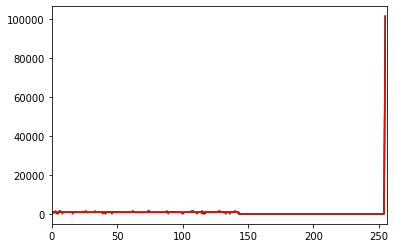

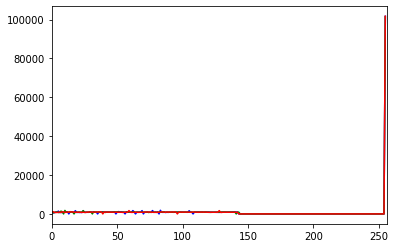

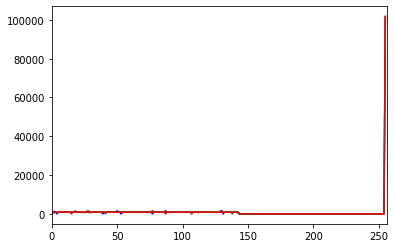

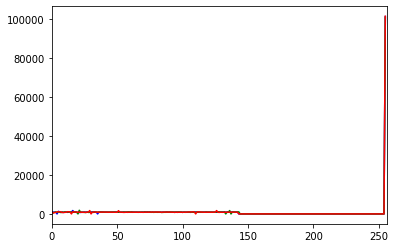

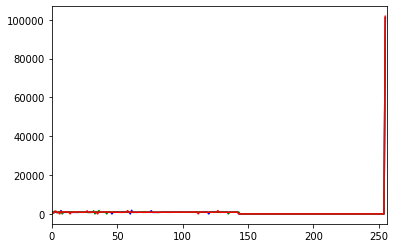

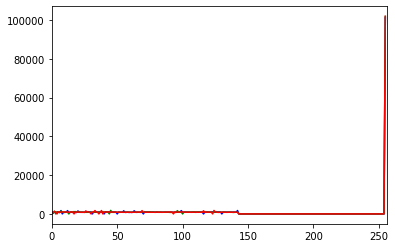

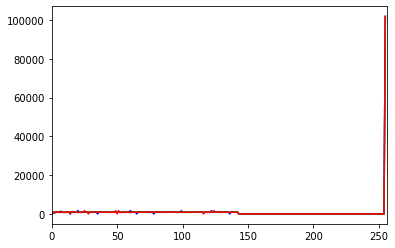

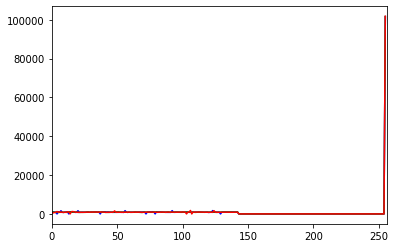

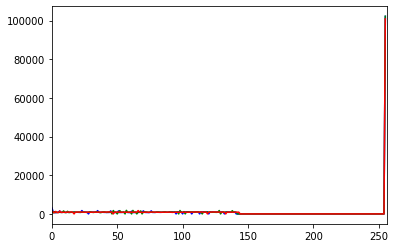

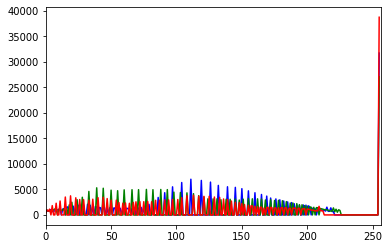

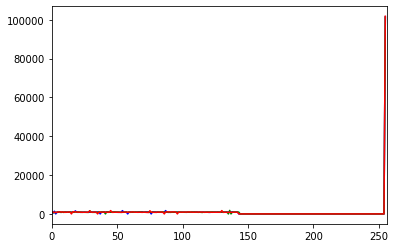

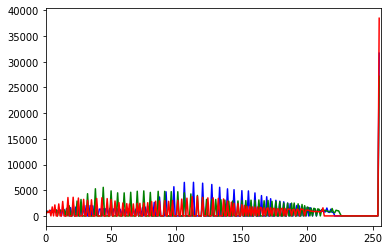

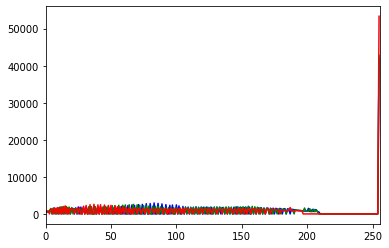

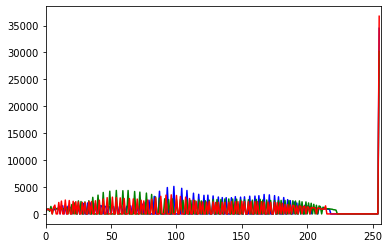

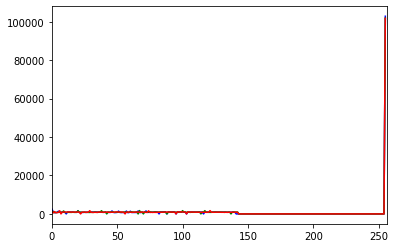

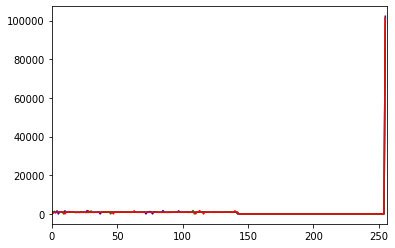

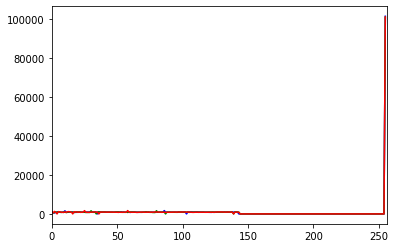

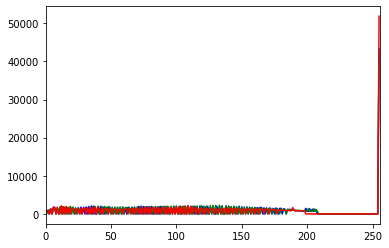

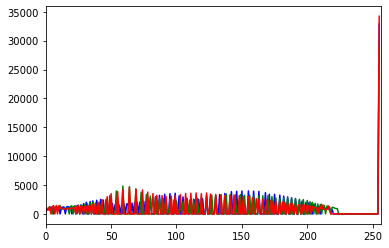

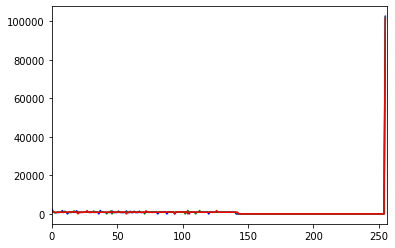

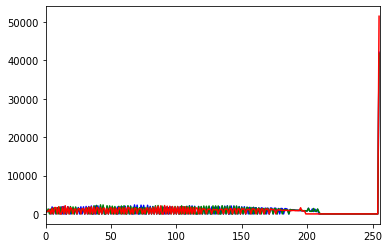

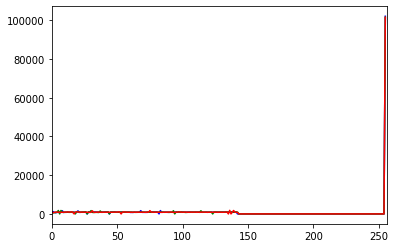

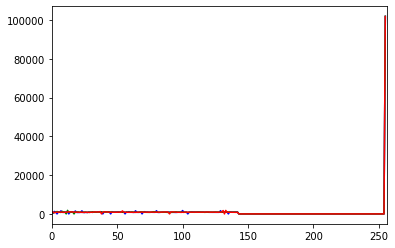

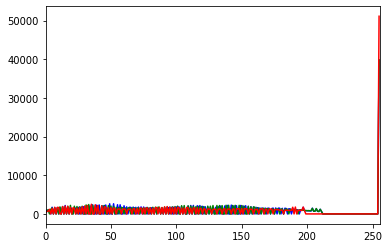

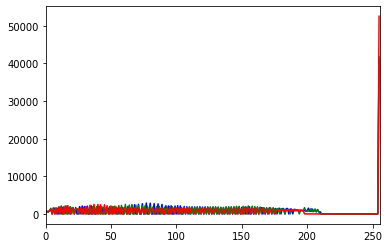

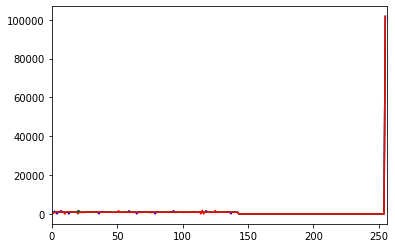

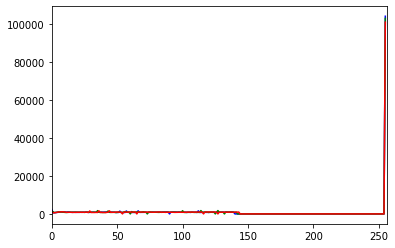

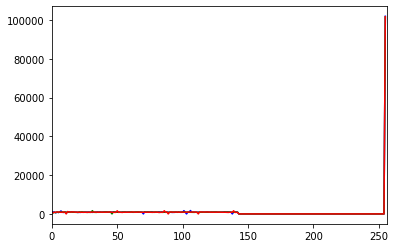

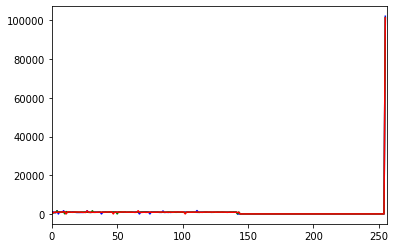

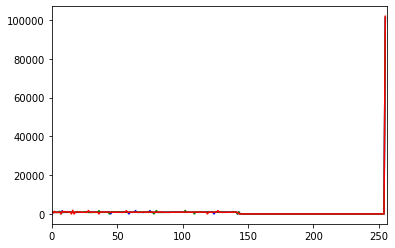

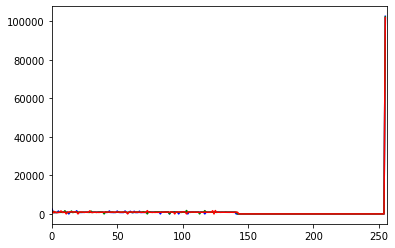

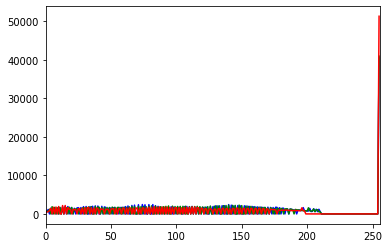

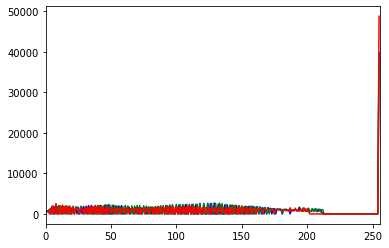

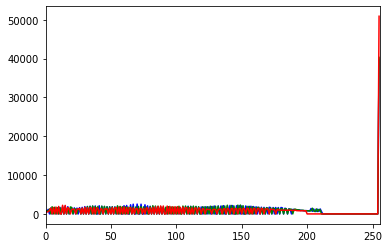

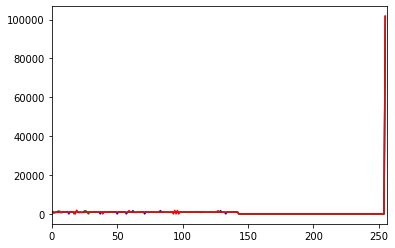

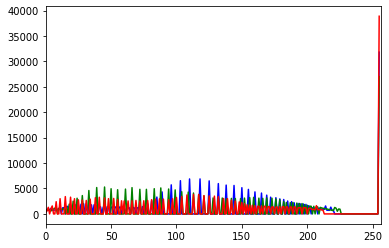

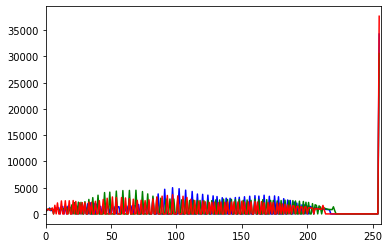

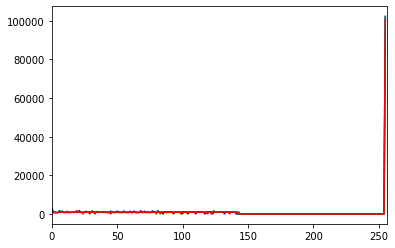

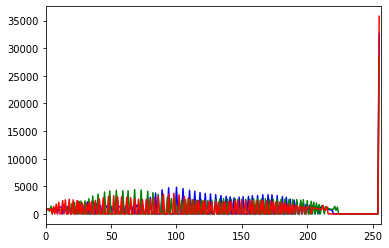

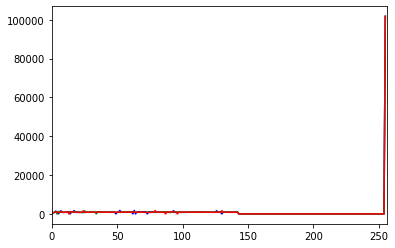

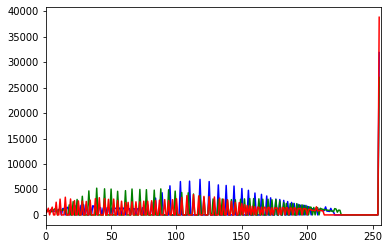

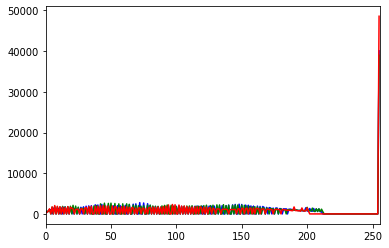

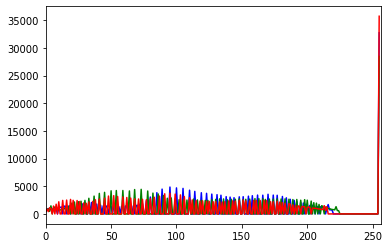

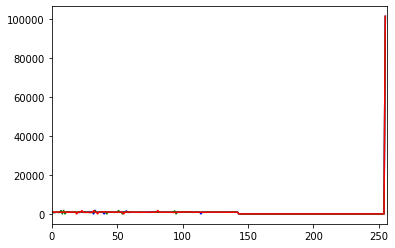

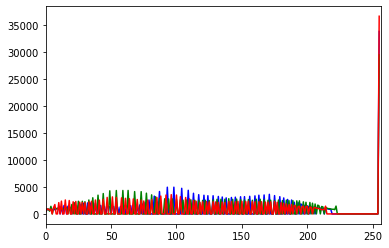

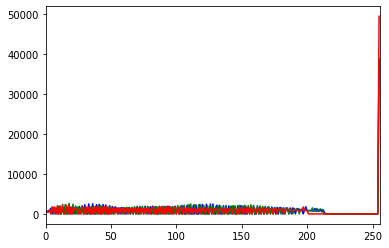

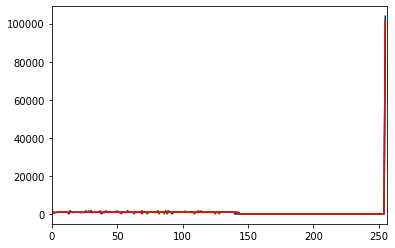

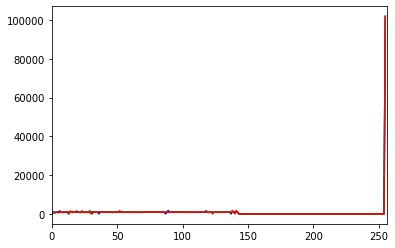

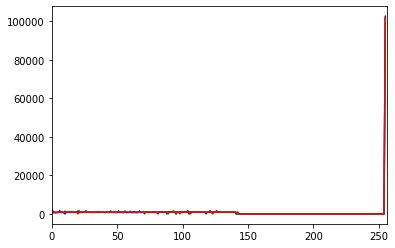

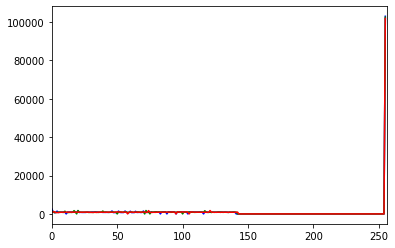

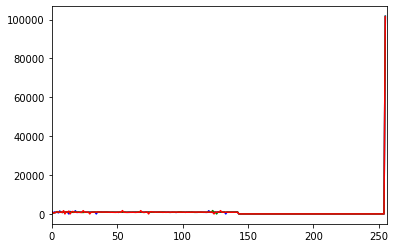

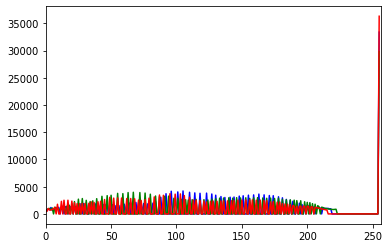

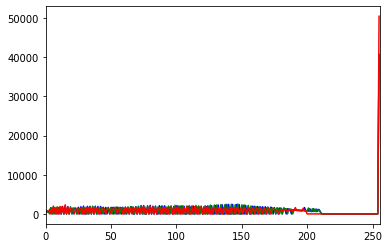

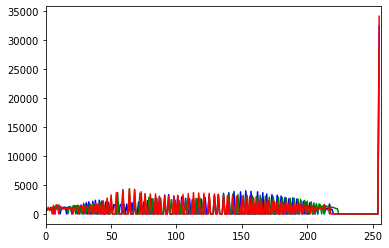

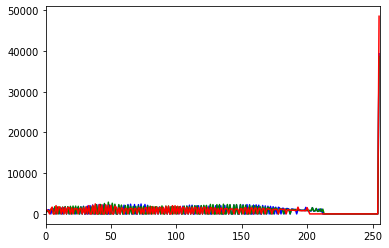

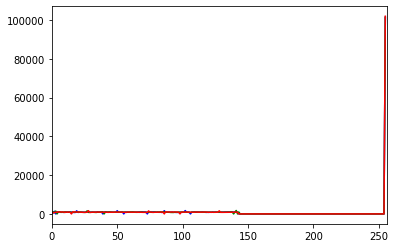

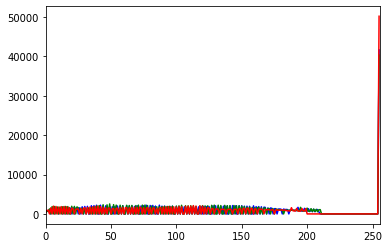

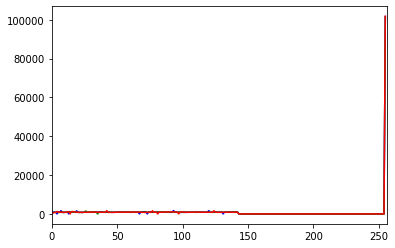

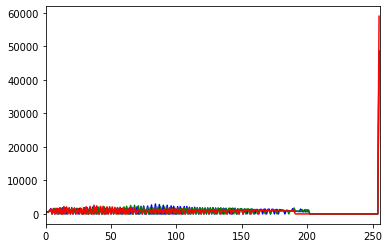

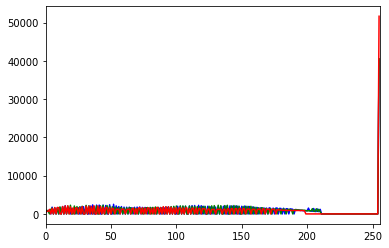

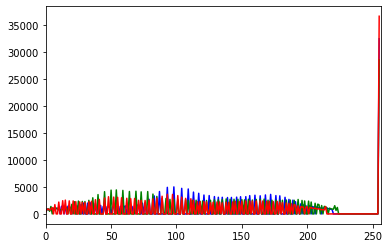

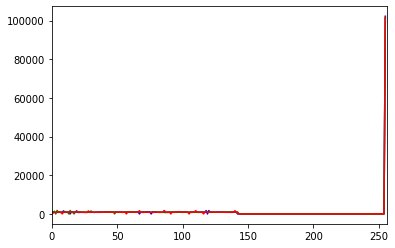

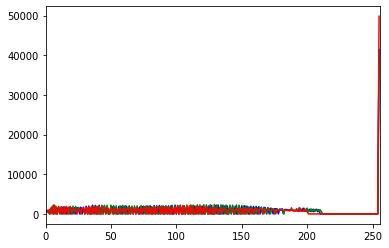

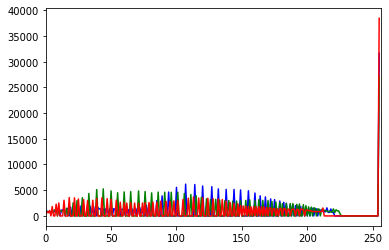

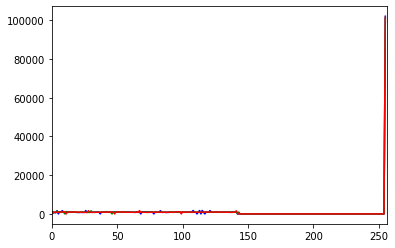

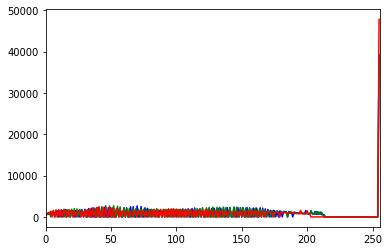

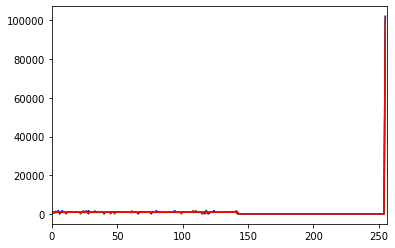

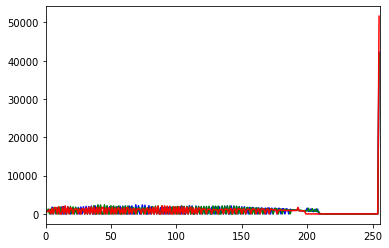

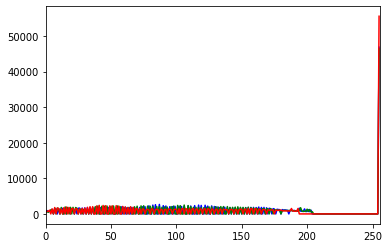

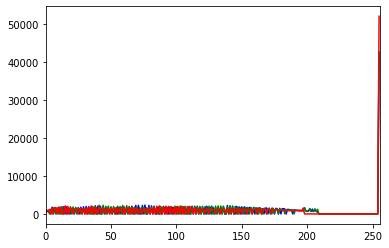

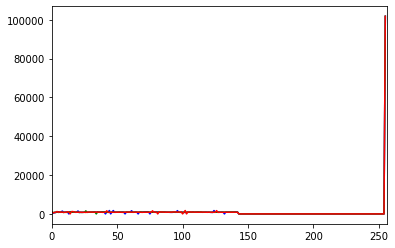

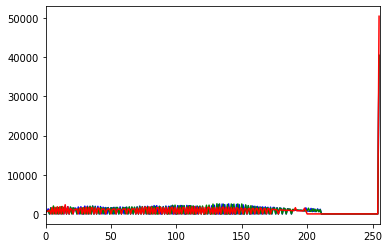

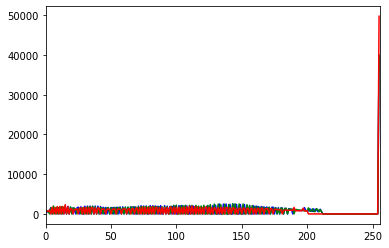

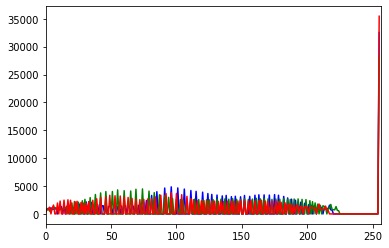

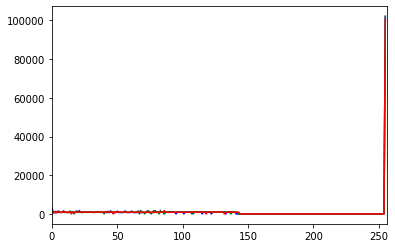

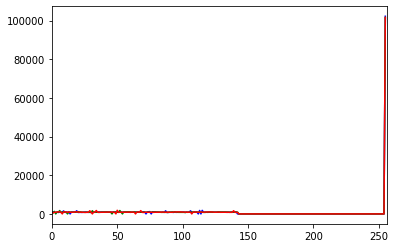

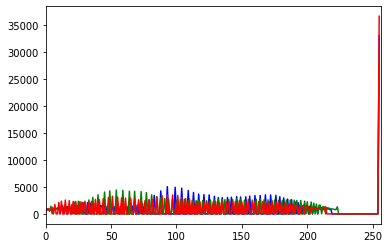

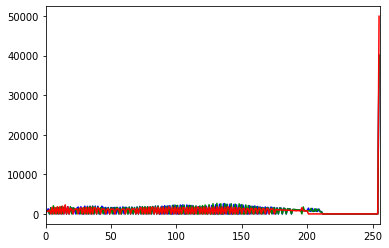

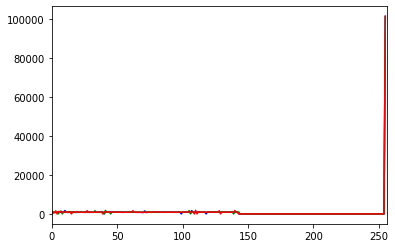

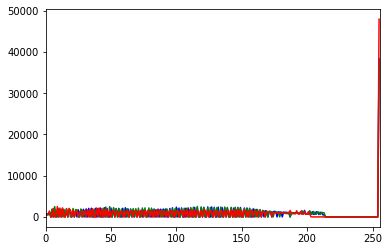

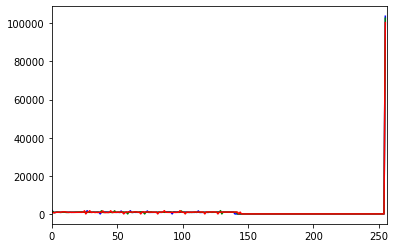

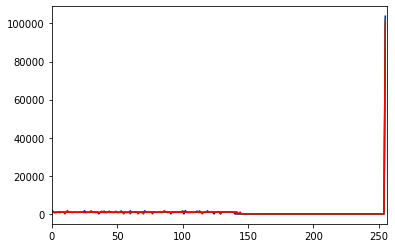

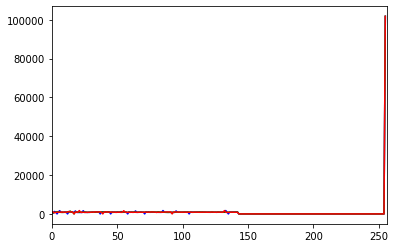

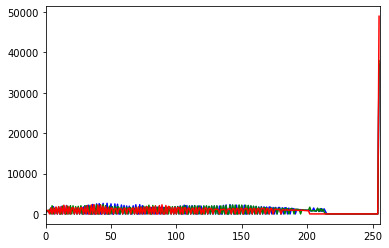

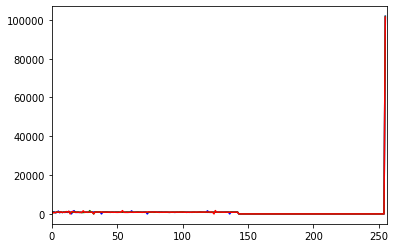

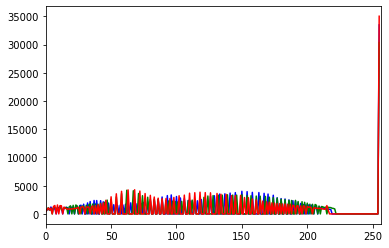

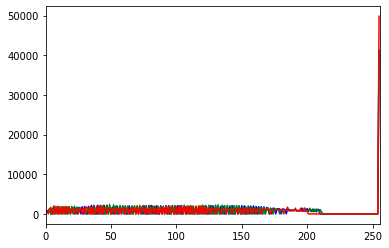

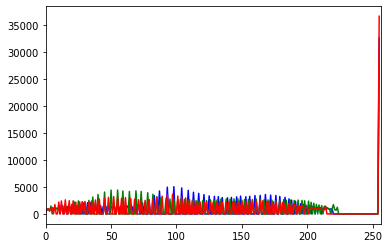

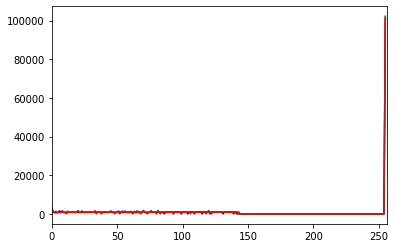

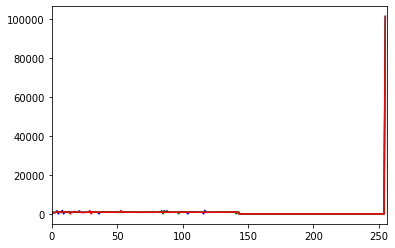

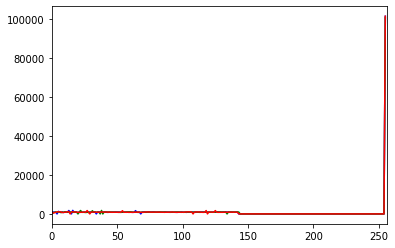

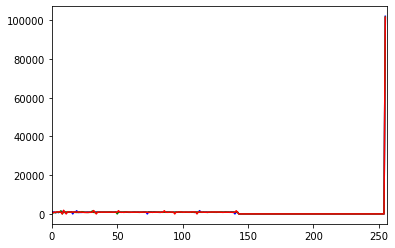

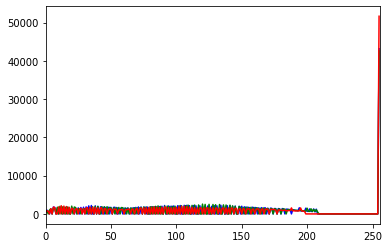

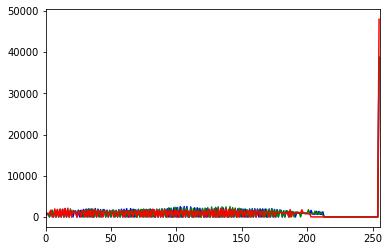

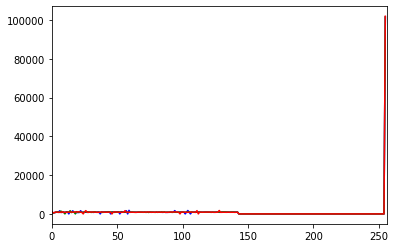

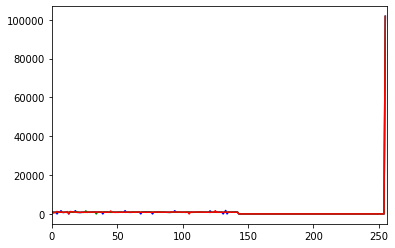

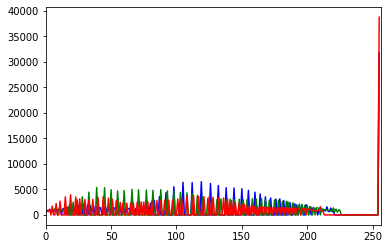

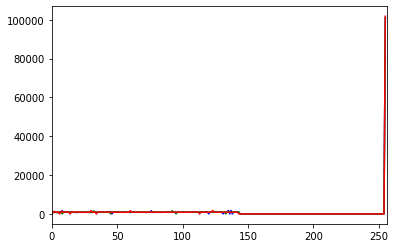

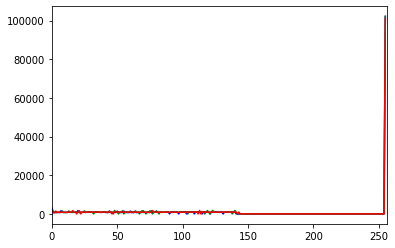

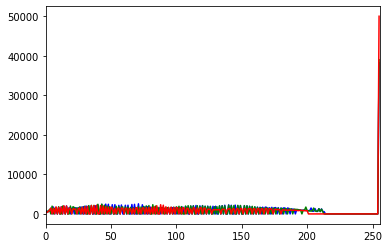

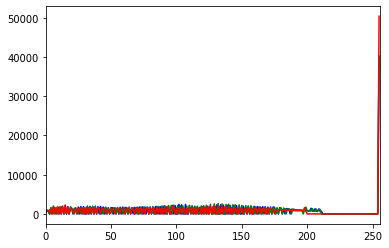

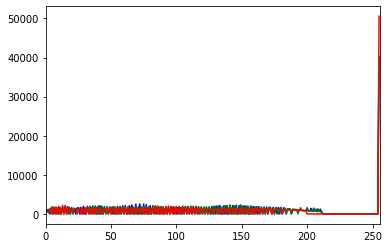

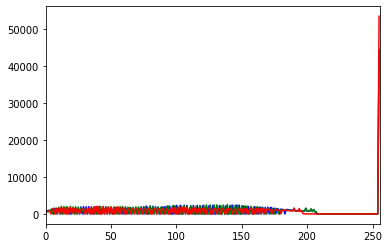

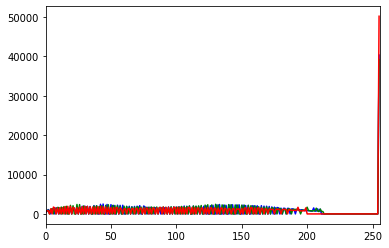

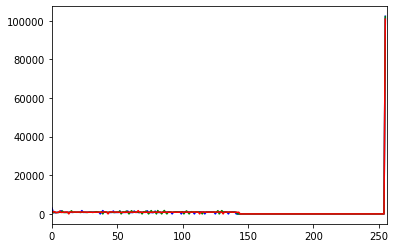

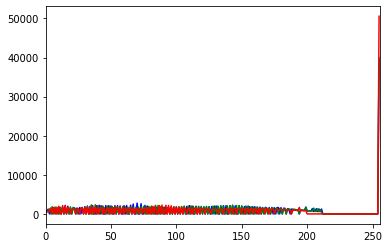

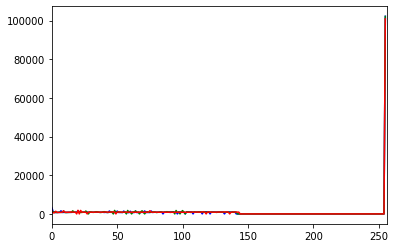

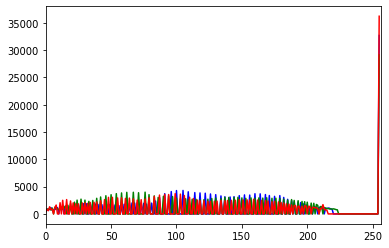

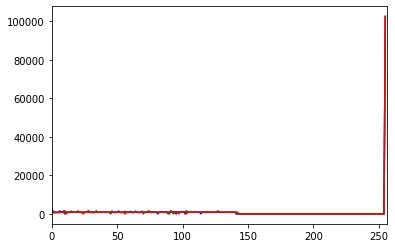

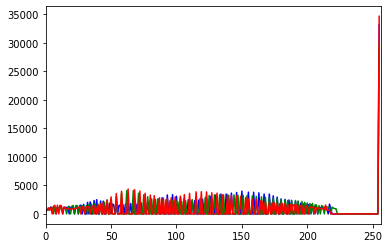

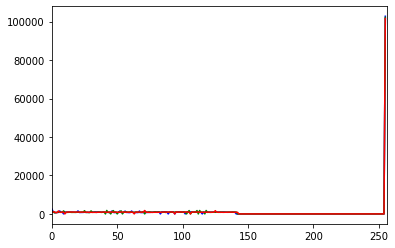

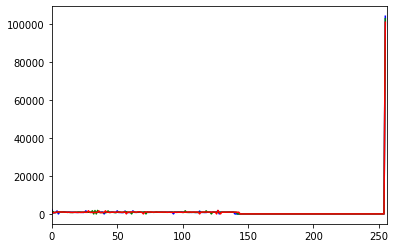

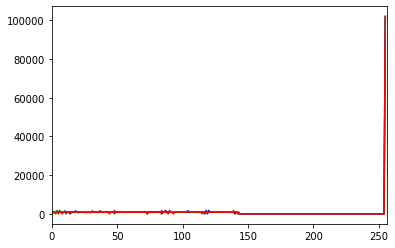

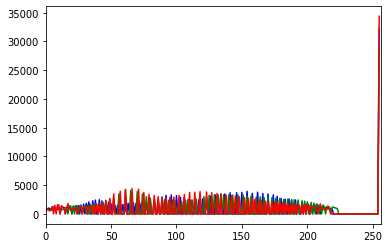

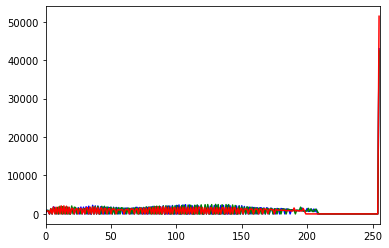

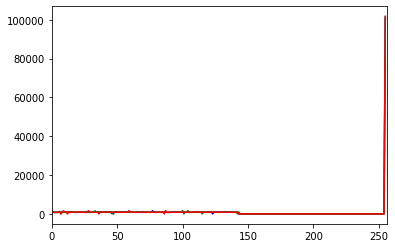

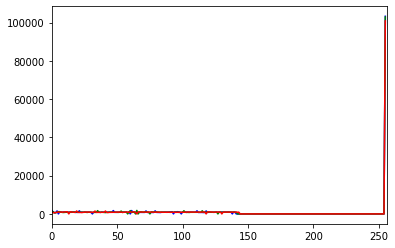

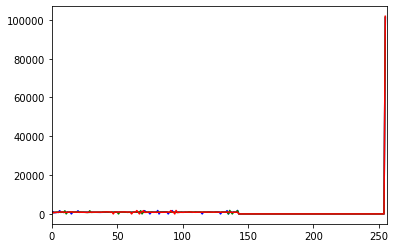

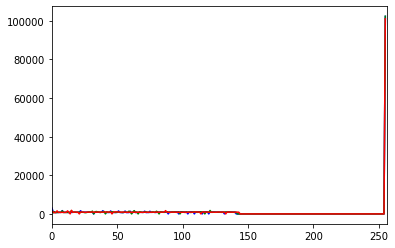

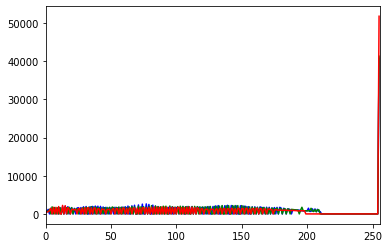

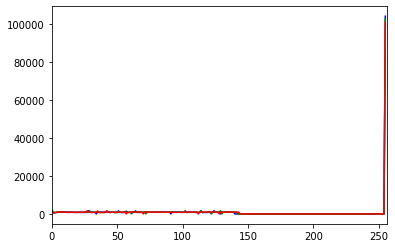

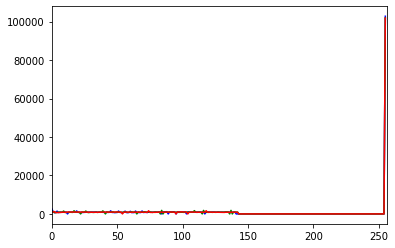

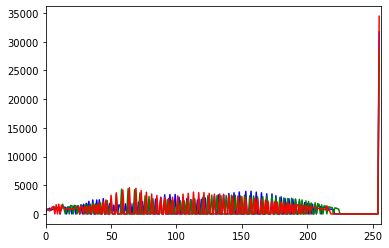

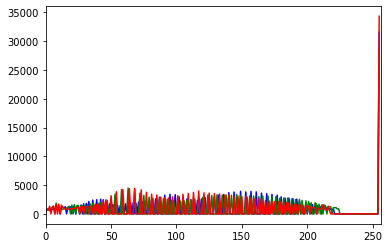

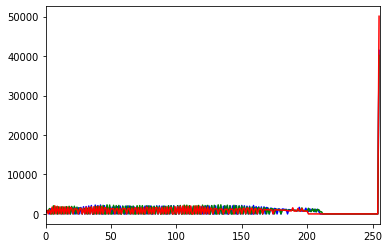

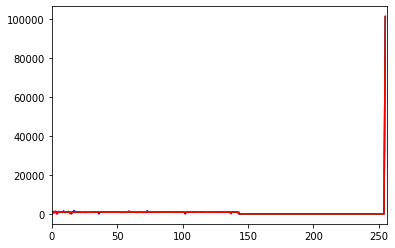

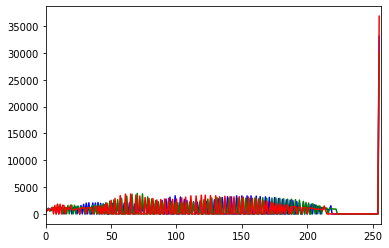

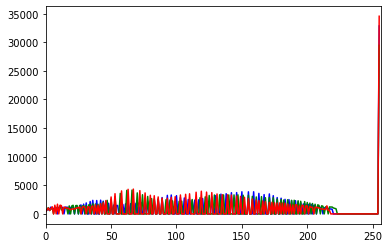

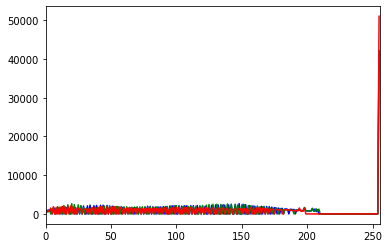

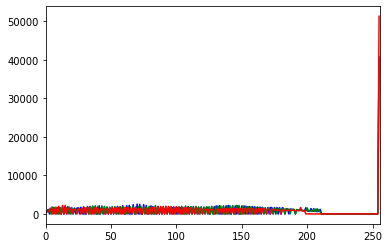

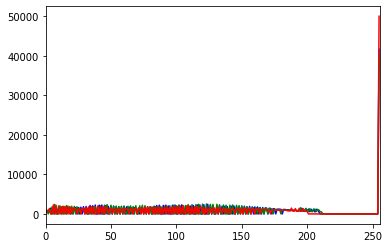

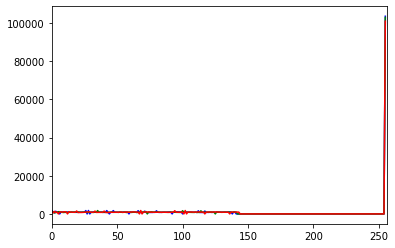

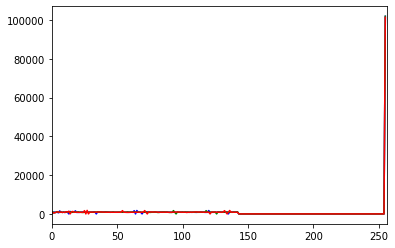

In [3]:
image_list = [image for image in glob.glob('291_DataSet/*.jpg')]

for image in image_list:
    input_image = cv2.imread(image)
    get_enhancedImage(input_image, image)
    